# DSI: Los angeles!

### A data science investigation of crime data from Los Angeles

## 1. Problem Definition
Given a dataset of crime records in a city, what insights can we draw from it.

## 2. Data
Crime Data is taken from 2020 to May 2023. This dataset reflects incidents of crime in the City of Los Angeles dating back to 2020. This data is transcribed from original crime reports that are typed on paper and therefore there may be some discrepencies within the data. Some location fields with missing data are noted as (0°, 0°). Address fields are only provided to the nearest hundred block in order to maintain privacy. This data is as accurate as the data in the database. Please note questions or concerns in the comments. The data is regularly updated. In this analyis the data from May to present day will be taken as a new data. It may be taken as new data to test models or forecasts.



## 3. Features
•	DR_NO : Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits

•	Date Rptd : MM/DD/YYYY
•	DATE OCC : MM/DD/YYYY
•	TIME OCC : In 24 hour military time.

•	AREA : The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.

•	AREA NAME : The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.

•	Rpt Dist No : A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the "RD" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74a4b4db1_4

•	Part 1-2
•	Crm Cd : Indicates the crime committed. (Same as Crime Code 1)

•	Crm Cd Desc : Defines the Crime Code provided.

•	Mocodes : Modus Operandi: Activities associated with the suspect in commission of the crime.See attached PDF for list of MO Codes in numerical order.
•	Vict Age : Two character numeric

•	Vict Sex : F - Female M - Male X - Unknown

•	Vict Descent : Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

•	Premis Cd : The type of structure, vehicle, or location where the crime took place.

•	Premis Desc : Defines the Premise Code provided.

•	Weapon Used Cd : The type of weapon used in the crime.

•	Weapon Desc : Defines the Weapon Used Code provided.

•	Status : Status of the case. (IC is the default)

•	Status Desc : Defines the Status Code provided.

•	Crm Cd 1 : Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.

•	Crm Cd 2 : May contain a code for an additional crime, less serious than Crime Code 1.

•	Crm Cd 3 : May contain a code for an additional crime, less serious than Crime Code 1.

•	Crm Cd 4 : May contain a code for an additional crime, less serious than Crime Code 1.

•	Cross Street : Cross Street of rounded Address

•	LAT : Latitude

•	LON : Longtitude


## 4. Exploratory Data Analysis

Data Exploration (Exploratory data analysis or EDA)
The goal here is to find out more about data and become a subject matter on the dataset you're working with Preliminary Data Exploration Challenge:

* What is the shape of dataframe ? How many rows and columns?
* What are the feature names?
* What are the time stamps included in the dataset?
* Are there any null values or duplicates?


In [1]:
# Regular EDA plotting libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df=pd.read_csv('Crime_Data_from_2020_to_Present.csv')

In [3]:
df.head()

DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0   10304468  01/08/2020 12:00:00 AM  01/08/2020 12:00:00 AM      2230     3   
1  190101086  01/02/2020 12:00:00 AM  01/01/2020 12:00:00 AM       330     1   
2  200110444  04/14/2020 12:00:00 AM  02/13/2020 12:00:00 AM      1200     1   
3  191501505  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM      1730    15   
4  191921269  01/01/2020 12:00:00 AM  01/01/2020 12:00:00 AM       415    19   

     AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0    Southwest          377         2     624   
1      Central          163         2     624   
2      Central          155         2     845   
3  N Hollywood         1543         2     745   
4      Mission         1998         2     740   

                                         Crm Cd Desc  ... Status  \
0                           BATTERY - SIMPLE ASSAULT  ...     AO   
1                           BATTERY - SIMPLE ASSAULT  ...     IC   
2          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...     AA   
3           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...     IC   
4  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   

    Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
0   Adult Other    624.0      NaN       NaN      NaN   
1   Invest Cont    624.0      NaN       NaN      NaN   
2  Adult Arrest    845.0      NaN       NaN      NaN   
3   Invest Cont    745.0    998.0       NaN      NaN   
4   Invest Cont    740.0      NaN       NaN      NaN   

                                   LOCATION Cross Street      LAT       LON  
0   1100 W  39TH                         PL          NaN  34.0141 -118.2978  
1    700 S  HILL                         ST          NaN  34.0459 -118.2545  
2    200 E  6TH                          ST          NaN  34.0448 -118.2474  
3   5400    CORTEEN                      PL          NaN  34.1685 -118.4019  
4  14400    TITUS                        ST          NaN  34.2198 -118.4468  

[5 rows x 28 columns]

In [4]:
duplicates = df.duplicated()
duplicates.unique()

array([False])

In [ ]:
# No duplicate rows were found.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708084 entries, 0 to 708083
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           708084 non-null  int64  
 1   Date Rptd       708084 non-null  object 
 2   DATE OCC        708084 non-null  object 
 3   TIME OCC        708084 non-null  int64  
 4   AREA            708084 non-null  int64  
 5   AREA NAME       708084 non-null  object 
 6   Rpt Dist No     708084 non-null  int64  
 7   Part 1-2        708084 non-null  int64  
 8   Crm Cd          708084 non-null  int64  
 9   Crm Cd Desc     708084 non-null  object 
 10  Mocodes         610782 non-null  object 
 11  Vict Age        708084 non-null  int64  
 12  Vict Sex        615442 non-null  object 
 13  Vict Descent    615436 non-null  object 
 14  Premis Cd       708076 non-null  float64
 15  Premis Desc     707699 non-null  object 
 16  Weapon Used Cd  245937 non-null  float64
 17  Weapon Des

In [6]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes            97302
Vict Age               0
Vict Sex           92642
Vict Descent       92648
Premis Cd              8
Premis Desc          385
Weapon Used Cd    462147
Weapon Desc       462147
Status                 0
Status Desc            0
Crm Cd 1               9
Crm Cd 2          655377
Crm Cd 3          706310
Crm Cd 4          708030
LOCATION               0
Cross Street      593460
LAT                    0
LON                    0
dtype: int64

In [7]:
missing_percentage = df.isnull().sum() / len(df) * 100
missing_percentage

DR_NO              0.000000
Date Rptd          0.000000
DATE OCC           0.000000
TIME OCC           0.000000
AREA               0.000000
AREA NAME          0.000000
Rpt Dist No        0.000000
Part 1-2           0.000000
Crm Cd             0.000000
Crm Cd Desc        0.000000
Mocodes           13.741590
Vict Age           0.000000
Vict Sex          13.083476
Vict Descent      13.084323
Premis Cd          0.001130
Premis Desc        0.054372
Weapon Used Cd    65.267256
Weapon Desc       65.267256
Status             0.000000
Status Desc        0.000000
Crm Cd 1           0.001271
Crm Cd 2          92.556392
Crm Cd 3          99.749465
Crm Cd 4          99.992374
LOCATION           0.000000
Cross Street      83.812090
LAT                0.000000
LON                0.000000
dtype: float64

In [8]:
df.nunique()

DR_NO             708084
Date Rptd           1210
DATE OCC            1210
TIME OCC            1439
AREA                  21
AREA NAME             21
Rpt Dist No         1194
Part 1-2               2
Crm Cd               138
Crm Cd Desc          138
Mocodes           240477
Vict Age             102
Vict Sex               4
Vict Descent          20
Premis Cd            311
Premis Desc          306
Weapon Used Cd        79
Weapon Desc           79
Status                 6
Status Desc            6
Crm Cd 1             140
Crm Cd 2             120
Crm Cd 3              36
Crm Cd 4               6
LOCATION           61678
Cross Street        9187
LAT                 5382
LON                 4961
dtype: int64

In [9]:
df['Date Rptd']

0         01/08/2020 12:00:00 AM
1         01/02/2020 12:00:00 AM
2         04/14/2020 12:00:00 AM
3         01/01/2020 12:00:00 AM
4         01/01/2020 12:00:00 AM
                   ...          
708079    01/08/2023 12:00:00 AM
708080    01/27/2023 12:00:00 AM
708081    03/22/2023 12:00:00 AM
708082    04/12/2023 12:00:00 AM
708083    03/05/2023 12:00:00 AM
Name: Date Rptd, Length: 708084, dtype: object

**The cursory data exploration shows that there are 28 features in total, with different percentage of missing values.We also note that there are no duplicate rows present in the dataframe. Now we will explore important features individually.**

In [10]:
df['Vict Age'].value_counts()

 0      172053
 30      16345
 35      15943
 29      15562
 31      15558
         ...  
 97         54
 98         51
-1          39
-2           6
 120         1
Name: Vict Age, Length: 102, dtype: int64

In [11]:
df['Vict Age'].describe()

count    708084.000000
mean         29.948323
std          21.700830
min          -2.000000
25%          12.000000
50%          31.000000
75%          45.000000
max         120.000000
Name: Vict Age, dtype: float64

**Now this is peculier, oldest victim is of 120 years of age while youngest is -2, but how is it possible? what kind of crime 
is committed on a unborn, it is also reported that most of the crimes is committed when victims age is 0. Interesting. Let us dig some deep.**

In [12]:
df['Vict Age'].nunique()

102

In [13]:
rows_with_negative_ages = df[(df['Vict Age'] == -1) ]


In [14]:
print(rows_with_negative_ages)

            DR_NO               Date Rptd                DATE OCC  TIME OCC  \
4384    221404829  01/18/2022 12:00:00 AM  07/16/2020 12:00:00 AM       300   
5504    220804701  11/25/2020 12:00:00 AM  11/24/2020 12:00:00 AM      1520   
12796   222106102  02/25/2022 12:00:00 AM  12/13/2020 12:00:00 AM      1430   
12905   220705955  02/21/2022 12:00:00 AM  05/30/2020 12:00:00 AM      2300   
12977   220906820  03/16/2022 12:00:00 AM  03/13/2020 12:00:00 AM      1200   
13434   220116792  07/22/2022 12:00:00 AM  06/19/2020 12:00:00 AM      1200   
14324   221810106  04/24/2022 12:00:00 AM  11/18/2020 12:00:00 AM         1   
15893   222007501  03/11/2022 12:00:00 AM  03/11/2020 12:00:00 AM      1425   
15911   222012214  07/12/2022 12:00:00 AM  10/01/2020 12:00:00 AM      1700   
16181   220800784  06/20/2022 12:00:00 AM  06/19/2020 12:00:00 AM      1600   
18118   210813843  09/09/2021 12:00:00 AM  07/01/2020 12:00:00 AM       800   
26575   220707578  04/04/2022 12:00:00 AM  05/01/202

**By looking at the type of crime committed, we can conclcude that the age feature has discrepencies**

In [15]:
cross_tab = pd.crosstab(rows_with_negative_ages['Crm Cd Desc'], df['Vict Age'])

(cross_tab)




Vict Age                                            -1
Crm Cd Desc                                           
BUNCO, GRAND THEFT                                   1
BURGLARY                                             4
DOCUMENT FORGERY / STOLEN FELONY                     2
EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)           5
SEX OFFENDER REGISTRANT OUT OF COMPLIANCE            6
SHOPLIFTING - PETTY THEFT ($950 & UNDER)             2
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND O...   2
THEFT OF IDENTITY                                    7
THEFT PLAIN - PETTY ($950 & UNDER)                   3
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIV...   2
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VAN...   4
VANDALISM - MISDEAMEANOR ($399 OR UNDER)             1

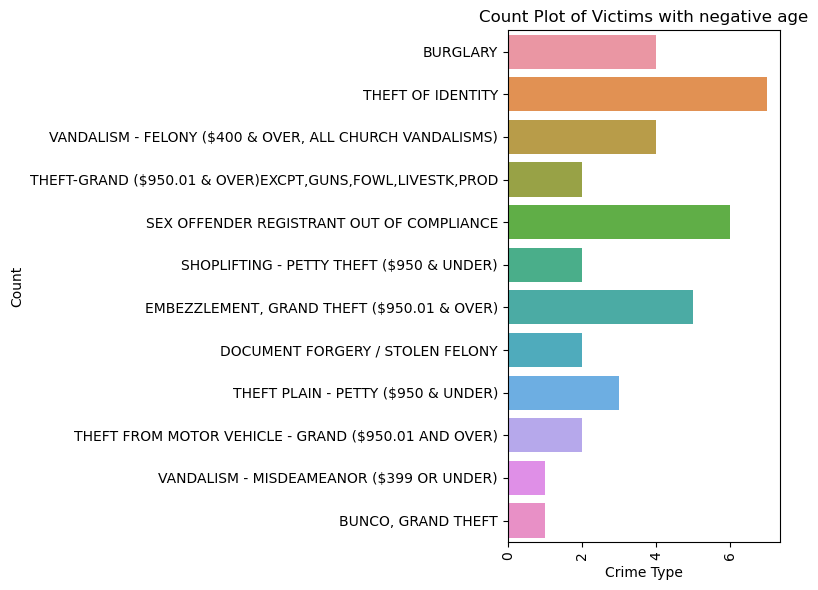

In [16]:
plt.figure(figsize=(8, 6))
sns.countplot(y='Crm Cd Desc', data=rows_with_negative_ages)

# Customize the plot
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.title('Count Plot of Victims with negative age')

# Rotate x-axis labels vertically
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

**Victims age might not be a relaible factor in the analysis.**

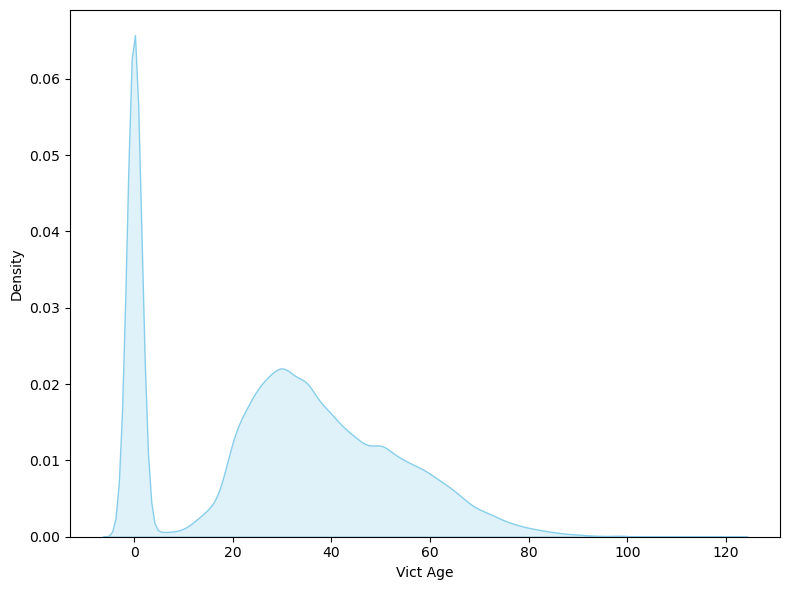

In [17]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Vict Age'], fill=True, color='skyblue')

# Customize the plot
plt.xlabel('Vict Age')
plt.ylabel('Density')


# Show the plot
plt.tight_layout()
plt.show()

In [18]:
rows_with_old_persons = df[(df['Vict Age'] > 80)]

In [19]:
rows_with_old_persons['Vict Age'].value_counts().count()

20

In [20]:
filtered_rows = rows_with_old_persons[rows_with_old_persons['Vict Age'] == 120]


In [21]:
filtered_rows

DR_NO               Date Rptd                DATE OCC  TIME OCC  \
96506  200808494  04/19/2020 12:00:00 AM  04/19/2020 12:00:00 AM      2145   

       AREA AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
96506     8   West LA          889         1     230   

                                          Crm Cd Desc  ... Status  \
96506  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     IC   

       Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
96506  Invest Cont    230.0    998.0       NaN      NaN   

                                      LOCATION Cross Street      LAT       LON  
96506  2000 S  BEDFORD                      ST          NaN  34.0416 -118.3836  

[1 rows x 28 columns]

So,it seems a 120 year old person is also not safe. 

**We may conclude that either in some cases the age was not disclosed or it was entered erronously. Now the question is what 
to do with these values.We have two options, either treat the values >=0 as outliers or club the values >=0 with mean/median value
of the victim age. As of now the mean value is 29.98 or 30 approximately and median age is 37. We will try both approaches. As there are only 20 rows for persons abobe 80. we will leave as it is.**

In [22]:
df['Vict Age'].median()

31.0

In [23]:
df_crime=df.copy()
df_crime1=df.copy()

In [24]:
def detect_outliers_zscore(data, threshold=3):
    """
    Detect outliers in a given data array using the z-score method.
    
    Parameters:
        data (array-like): Input data array.
        threshold (float): Threshold value to determine outliers (default: 3).
    
    Returns:
        outliers (array-like): Array of outlier indices.
    """
    z_scores = (data - np.mean(data)) / np.std(data)
    outliers = np.where(np.abs(z_scores) > threshold)[0]
    return outliers

# Example usage
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
outlier_counts = df[numeric_columns].apply(lambda column: len(detect_outliers_zscore(column)))

# Print the outlier counts for each column
for column, count in zip(outlier_counts.index, outlier_counts.values):
    print(f"Column '{column}': {count} outlier(s)")

Column 'DR_NO': 4 outlier(s)
Column 'TIME OCC': 0 outlier(s)
Column 'AREA': 0 outlier(s)
Column 'Rpt Dist No': 0 outlier(s)
Column 'Part 1-2': 0 outlier(s)
Column 'Crm Cd': 0 outlier(s)
Column 'Vict Age': 429 outlier(s)
Column 'Premis Cd': 370 outlier(s)
Column 'Weapon Used Cd': 0 outlier(s)
Column 'Crm Cd 1': 0 outlier(s)
Column 'Crm Cd 2': 1155 outlier(s)
Column 'Crm Cd 3': 57 outlier(s)
Column 'Crm Cd 4': 1 outlier(s)
Column 'LAT': 2266 outlier(s)
Column 'LON': 2266 outlier(s)


In [25]:
def detect_outliers_iqr(data, threshold=1.5):
    """
    Detect outliers in a given data array using the IQR method.
    
    Parameters:
        data (array-like): Input data array.
        threshold (float): Threshold value to determine outliers (default: 1.5).
    
    Returns:
        outliers (array-like): Array of outlier indices.
    """
    # Calculate the first and third quartiles
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    # Calculate the IQR
    iqr = q3 - q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    
    # Find the outliers
    outliers = np.where((data < lower_bound) | (data > upper_bound))[0]
    
    return outliers

# Example usage
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
outlier_counts = df[numeric_columns].apply(lambda column: len(detect_outliers_iqr(column)))

# Print the outlier counts for each column
for column, count in zip(outlier_counts.index, outlier_counts.values):
    print(f"Column '{column}': {count} outlier(s)")


Column 'DR_NO': 4 outlier(s)
Column 'TIME OCC': 0 outlier(s)
Column 'AREA': 0 outlier(s)
Column 'Rpt Dist No': 0 outlier(s)
Column 'Part 1-2': 0 outlier(s)
Column 'Crm Cd': 0 outlier(s)
Column 'Vict Age': 501 outlier(s)
Column 'Premis Cd': 0 outlier(s)
Column 'Weapon Used Cd': 0 outlier(s)
Column 'Crm Cd 1': 0 outlier(s)
Column 'Crm Cd 2': 0 outlier(s)
Column 'Crm Cd 3': 0 outlier(s)
Column 'Crm Cd 4': 0 outlier(s)
Column 'LAT': 22333 outlier(s)
Column 'LON': 2308 outlier(s)


In [26]:
# Step 1: Calculate the median of the 'Vict Age' column
age_median = df_crime[df_crime['Vict Age'] > 0]['Vict Age'].median()



In [27]:
age_median

37.0

In [28]:
age_mean = df_crime[df_crime['Vict Age'] > 0]['Vict Age'].mean()

In [29]:
age_mean

39.564427055930565

In [30]:
# Replace values equal to or below zero with the median age
df_crime.loc[df_crime['Vict Age'] <= 0, 'Vict Age'] = age_median

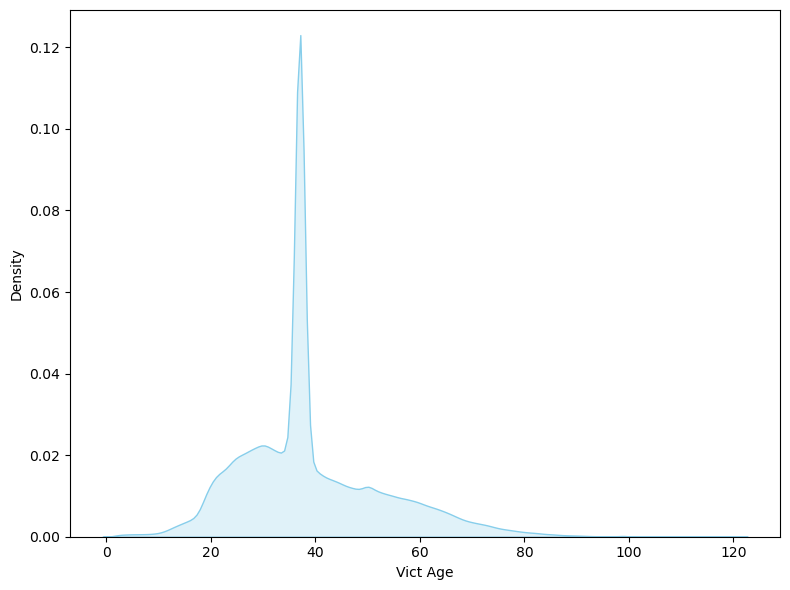

In [31]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df_crime['Vict Age'], fill=True, color='skyblue')

# Customize the plot
plt.xlabel('Vict Age')
plt.ylabel('Density')


# Show the plot
plt.tight_layout()
plt.show()

**Now we move on to further analysis of other features of interest. After age what should be the other important feature? It should be the gender and then race. Because some crimes committed may be specific to genders such as sexual assualt. In the next step we would expolre the age feature in the dataset.**

In [32]:
df['Vict Sex'].value_counts()

M    293879
F    261903
X     59578
H        82
Name: Vict Sex, dtype: int64

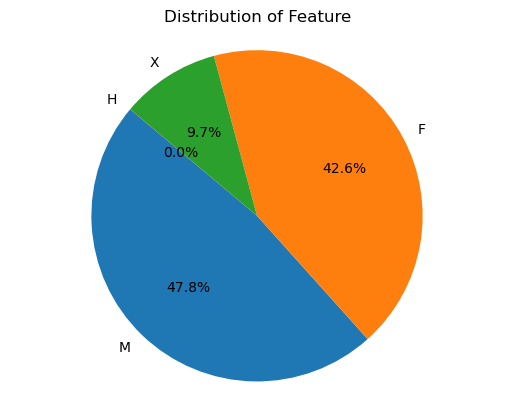

In [33]:
# Step 1: Extract the data for the feature you want to plot
feature_data = df['Vict Sex']

# Step 2: Calculate the count of each category in the feature
category_counts = feature_data.value_counts()

# Step 3: Create the pie plot
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Feature')
plt.show()






**According to our dataset the gender X is decribed as unknown however there is no description of gender as H. However there is a race with code H. So either it may be entered incorrectly or deliberately. let us see what constitutes H.** 

In [34]:
filt = df.loc[df['Vict Sex'] == 'H']

In [35]:
filt

DR_NO               Date Rptd                DATE OCC  TIME OCC  \
1512    200204197  01/03/2020 12:00:00 AM  01/03/2020 12:00:00 AM      2200   
1835    200204938  01/20/2020 12:00:00 AM  01/20/2020 12:00:00 AM        40   
4577    200504351  01/08/2020 12:00:00 AM  01/07/2020 12:00:00 AM      1100   
15004   200714556  10/05/2020 12:00:00 AM  10/05/2020 12:00:00 AM       200   
16295   200708374  04/14/2020 12:00:00 AM  04/14/2020 12:00:00 AM      1300   
...           ...                     ...                     ...       ...   
664206  231904111  01/04/2023 12:00:00 AM  01/01/2023 12:00:00 AM       734   
689811  230405137  02/03/2023 12:00:00 AM  01/03/2023 12:00:00 AM         5   
692354  230908111  04/13/2023 12:00:00 AM  04/12/2023 12:00:00 AM      1530   
697109  230407032  04/02/2023 12:00:00 AM  04/02/2023 12:00:00 AM      1530   
706723  230404193  01/05/2023 12:00:00 AM  01/01/2023 12:00:00 AM         5   

        AREA   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
1512       2     Rampart          237         2     740   
1835       2     Rampart          238         1     251   
4577       5      Harbor          566         2     624   
15004      7    Wilshire          769         1     230   
16295      7    Wilshire          721         1     330   
...      ...         ...          ...       ...     ...   
664206    19     Mission         1998         2     354   
689811     4  Hollenbeck          448         2     354   
692354     9    Van Nuys          923         1     330   
697109     4  Hollenbeck          497         2     624   
706723     4  Hollenbeck          464         2     354   

                                              Crm Cd Desc  ... Status  \
1512    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...     IC   
1835                    SHOTS FIRED AT INHABITED DWELLING  ...     IC   
4577                             BATTERY - SIMPLE ASSAULT  ...     IC   
15004      ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  ...     IC   
16295                               BURGLARY FROM VEHICLE  ...     IC   
...                                                   ...  ...    ...   
664206                                  THEFT OF IDENTITY  ...     IC   
689811                                  THEFT OF IDENTITY  ...     IC   
692354                              BURGLARY FROM VEHICLE  ...     IC   
697109                           BATTERY - SIMPLE ASSAULT  ...     IC   
706723                                  THEFT OF IDENTITY  ...     IC   

        Status Desc Crm Cd 1 Crm Cd 2  Crm Cd 3 Crm Cd 4  \
1512    Invest Cont    740.0      NaN       NaN      NaN   
1835    Invest Cont    251.0    998.0       NaN      NaN   
4577    Invest Cont    624.0      NaN       NaN      NaN   
15004   Invest Cont    230.0      NaN       NaN      NaN   
16295   Invest Cont    330.0      NaN       NaN      NaN   
...             ...      ...      ...       ...      ...   
664206  Invest Cont    354.0      NaN       NaN      NaN   
689811  Invest Cont    354.0      NaN       NaN      NaN   
692354  Invest Cont    330.0      NaN       NaN      NaN   
697109  Invest Cont    624.0      NaN       NaN      NaN   
706723  Invest Cont    354.0      NaN       NaN      NaN   

                                       LOCATION  \
1512    1600 W  2ND                          ST   
1835     100 N  TOLUCA                       ST   
4577     200 W  12TH                         ST   
15004           15TH                         ST   
16295   8500    COLGATE                      AV   
...                                         ...   
664206  7800    PEACHTREE                    AV   
689811  1500 N  EVERGREEN                    AV   
692354                                  VANOWEN   
697109  3300    HUNTER                       ST   
706723   400 N  ST LOUIS                     ST   

                           Cross Street      LAT       LON  
1512                                NaN  34.0613 -118.2638  
1835                 

**We can not conclude with conviction that it is due to what kind of error. there are also missing values in the Victim sex column. An approach we can take is we can club the H and X category as not specified. And we will replace the missing values with Mode. But we have to be careful here. Because suppose the crime type is women specific and we fill it with male victim,it will have some implication. lets find out what the mode is.**

In [36]:
df['Vict Sex'].mode()

0    M
Name: Vict Sex, dtype: object

lets filter out the NaN values

In [37]:
filt1 = df[pd.isna(df['Vict Sex'])]
filt1['Crm Cd Desc']

33                                         VEHICLE - STOLEN
45          THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
78                                         VEHICLE - STOLEN
104                                        VEHICLE - STOLEN
105                                        VEHICLE - STOLEN
                                ...                        
708060      THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
708061    VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, B...
708062                             VEHICLE - ATTEMPT STOLEN
708071                                     VEHICLE - STOLEN
708073                                     VEHICLE - STOLEN
Name: Crm Cd Desc, Length: 92642, dtype: object

In [38]:
filt1['Crm Cd Desc'].value_counts()

VEHICLE - STOLEN                                            75672
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)             14549
EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)                   1407
VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)      500
BOAT - STOLEN                                                  93
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD       68
BURGLARY                                                       59
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)        29
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                 25
THEFT PLAIN - PETTY ($950 & UNDER)                             25
ROBBERY                                                        22
TRESPASSING                                                    19
BATTERY - SIMPLE ASSAULT                                       19
BURGLARY FROM VEHICLE                                          18
THEFT OF IDENTITY                                              17
DOCUMENT F

**As is clear from the crime type for NaN values these can occur for any gender. So it is better to change the all the NaN values and H gender as X**

In [39]:
df_crime['Vict Sex'] = df_crime['Vict Sex'].replace({'H': 'X', pd.NA: 'X'})

In [40]:
df_crime['Vict Sex'].value_counts()

M    293879
F    261903
X    152302
Name: Vict Sex, dtype: int64

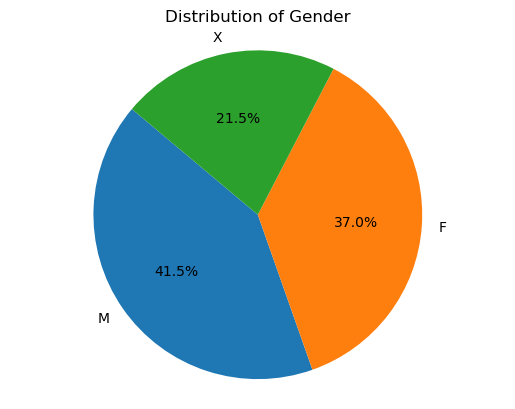

In [41]:
# Step 1: Extract the data for the feature you want to plot
feature_data = df_crime['Vict Sex']

# Step 2: Calculate the count of each category in the feature
category_counts = feature_data.value_counts()

# Step 3: Create the pie plot
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Distribution of Gender')
plt.show()

In [ ]:
#Now let us explore what was the crime most often committed against the gender.

In [42]:
result = df[df['Vict Sex'] == 'M']['Crm Cd Desc'].value_counts()
result

BATTERY - SIMPLE ASSAULT                                   29248
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             29028
BURGLARY FROM VEHICLE                                      24800
BURGLARY                                                   21483
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    20242
                                                           ...  
PURSE SNATCHING - ATTEMPT                                      1
BIGAMY                                                         1
PICKPOCKET, ATTEMPT                                            1
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)                   1
PIMPING                                                        1
Name: Crm Cd Desc, Length: 134, dtype: int64

In [43]:
# Filter the result to include counts over 100
result_filtered = result[result > 1000]

# Print the filtered result
print(result_filtered)

BATTERY - SIMPLE ASSAULT                                    29248
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              29028
BURGLARY FROM VEHICLE                                       24800
BURGLARY                                                    21483
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     20242
THEFT OF IDENTITY                                           18563
THEFT PLAIN - PETTY ($950 & UNDER)                          17025
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)         15331
ROBBERY                                                     14530
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    11143
INTIMATE PARTNER - SIMPLE ASSAULT                            8663
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     8661
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              7386
BRANDISH WEAPON                                              7251
CRIMINAL THREATS - NO WEAPON DISPLAYED                       6967
SHOPLIFTIN

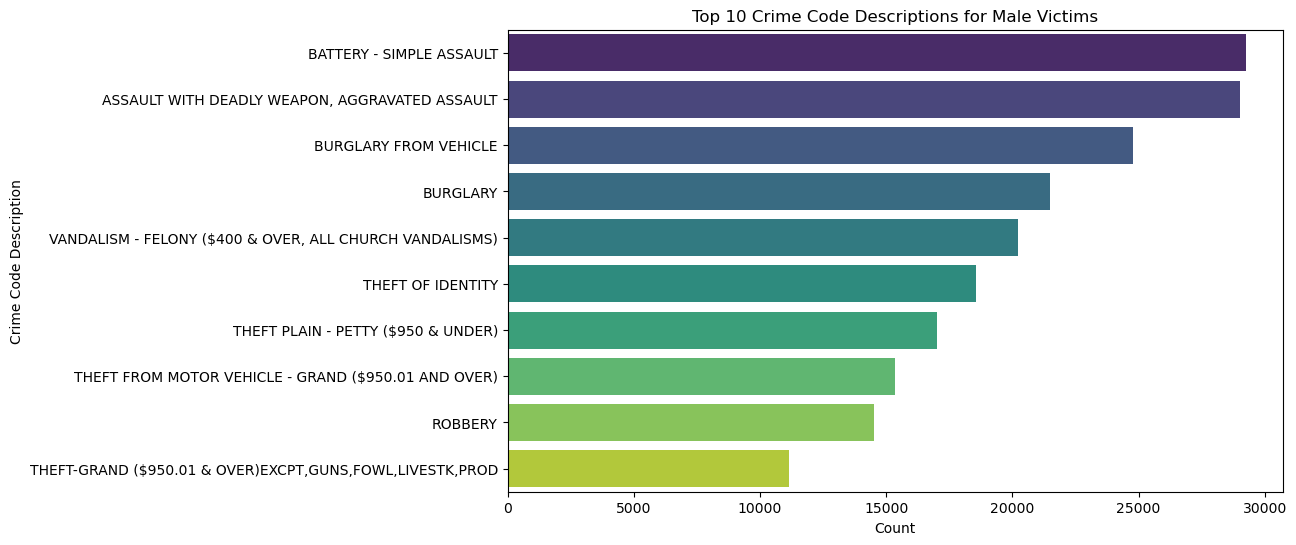

In [44]:
# Select the top 10 values
top_10_values = result.head(10)

# Convert top 10 values Series to a DataFrame
top_10_df = top_10_values.reset_index()
top_10_df.columns = ['Crm Cd Desc', 'Count']

# Create a count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Crm Cd Desc', data=top_10_df, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Crime Code Description')
plt.title('Top 10 Crime Code Descriptions for Male Victims')
plt.show()

In [45]:
result_2 = df[df['Vict Sex'] == 'F']['Crm Cd Desc'].value_counts()
result_2

INTIMATE PARTNER - SIMPLE ASSAULT                           27074
THEFT OF IDENTITY                                           26932
BATTERY - SIMPLE ASSAULT                                    26254
BURGLARY FROM VEHICLE                                       18380
THEFT PLAIN - PETTY ($950 & UNDER)                          15448
                                                            ...  
BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM        2
BRIBERY                                                         2
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        1
LYNCHING - ATTEMPTED                                            1
BLOCKING DOOR INDUCTION CENTER                                  1
Name: Crm Cd Desc, Length: 130, dtype: int64

In [46]:
# Filter the result to include counts over 100
result_2_filtered = result_2[result_2 > 1000]

# Print the filtered result
print(result_2_filtered)

INTIMATE PARTNER - SIMPLE ASSAULT                           27074
THEFT OF IDENTITY                                           26932
BATTERY - SIMPLE ASSAULT                                    26254
BURGLARY FROM VEHICLE                                       18380
THEFT PLAIN - PETTY ($950 & UNDER)                          15448
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     15007
BURGLARY                                                    11796
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              10863
THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)          9594
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     8231
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     7958
INTIMATE PARTNER - AGGRAVATED ASSAULT                        7495
CRIMINAL THREATS - NO WEAPON DISPLAYED                       7413
VIOLATION OF RESTRAINING ORDER                               6827
ROBBERY                                                      5876
THEFT FROM

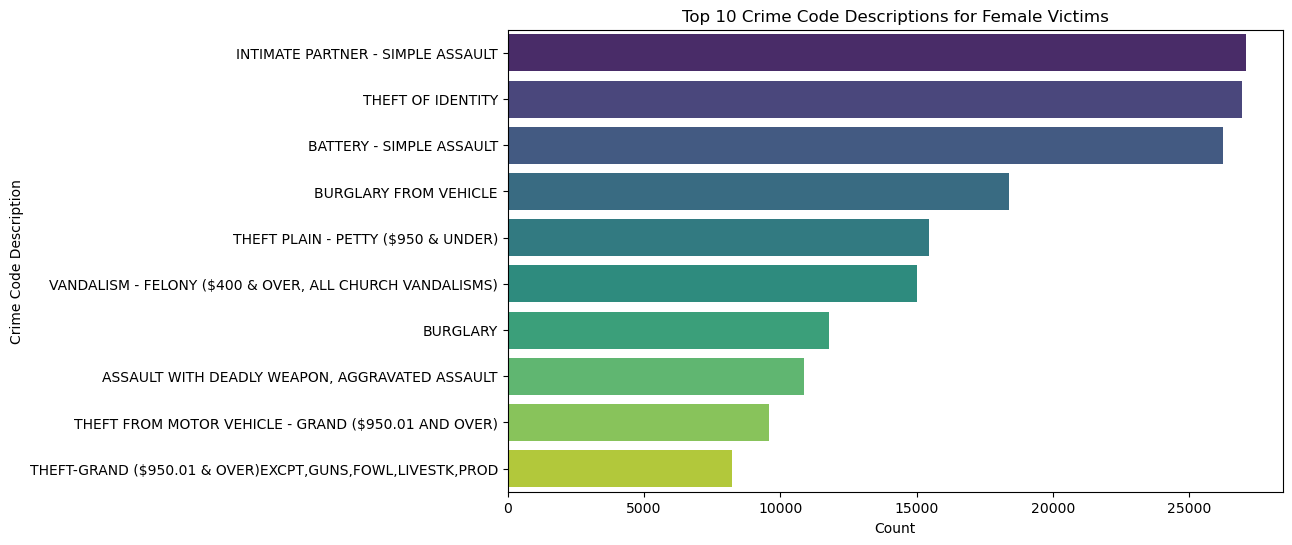

In [47]:
# Select the top 10 values
top_10_values = result_2.head(10)

# Convert top 10 values Series to a DataFrame
top_10_df = top_10_values.reset_index()
top_10_df.columns = ['Crm Cd Desc', 'Count']

# Create a count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Crm Cd Desc', data=top_10_df, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Crime Code Description')
plt.title('Top 10 Crime Code Descriptions for Female Victims')
plt.show()

In [48]:
result_3 = df[df['Vict Sex'] == 'X']['Crm Cd Desc'].value_counts()
result_3

BURGLARY                                                   9846
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    8280
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                   7643
ROBBERY                                                    3907
THEFT PLAIN - PETTY ($950 & UNDER)                         3718
                                                           ... 
GRAND THEFT / AUTO REPAIR                                     1
TELEPHONE PROPERTY - DAMAGE                                   1
DISRUPT SCHOOL                                                1
BIGAMY                                                        1
KIDNAPPING - GRAND ATTEMPT                                    1
Name: Crm Cd Desc, Length: 126, dtype: int64

In [49]:
result_3_filtered = result_3[result_3 > 1000]

# Print the filtered result
print(result_3_filtered)

BURGLARY                                                    9846
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     8280
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                    7643
ROBBERY                                                     3907
THEFT PLAIN - PETTY ($950 & UNDER)                          3718
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                    3134
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD    2973
TRESPASSING                                                 2858
SHOPLIFTING-GRAND THEFT ($950.01 & OVER)                    1542
OTHER MISCELLANEOUS CRIME                                   1489
DISCHARGE FIREARMS/SHOTS FIRED                              1313
Name: Crm Cd Desc, dtype: int64


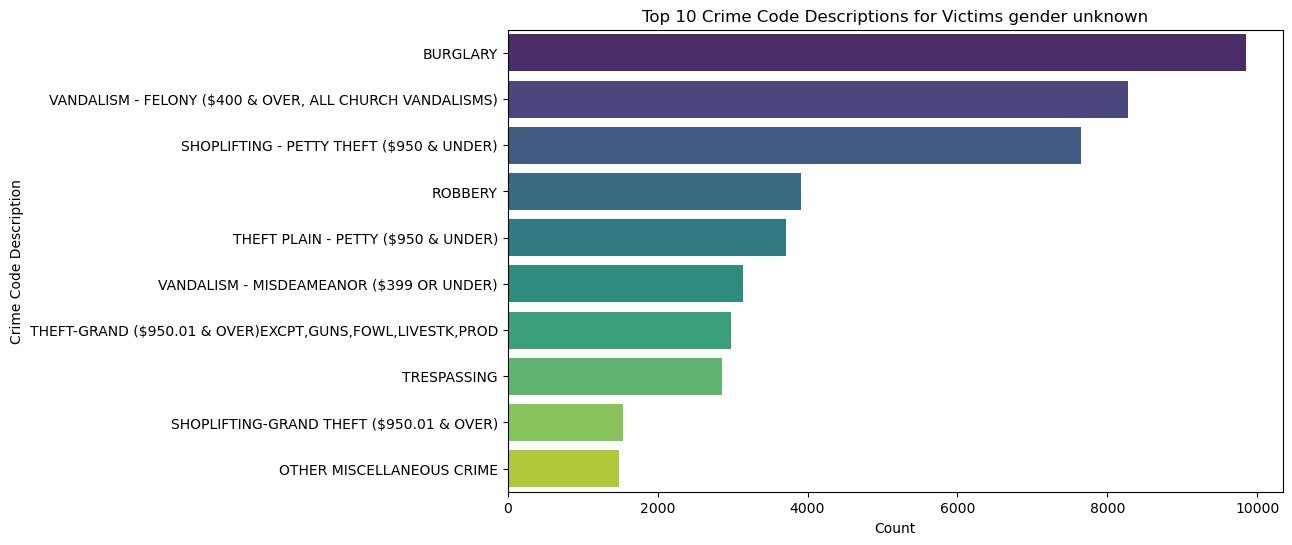

In [50]:
# Select the top 10 values
top_10_values = result_3.head(10)

# Convert top 10 values Series to a DataFrame
top_10_df = top_10_values.reset_index()
top_10_df.columns = ['Crm Cd Desc', 'Count']

# Create a count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Crm Cd Desc', data=top_10_df, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Crime Code Description')
plt.title('Top 10 Crime Code Descriptions for Victims gender unknown')
plt.show()

Now let's explore the crimes committed along the racial line. 

In [51]:
df['Vict Descent'].isnull().sum()

92648

In [52]:
race_count=df['Vict Descent'].value_counts()
race_count

H    217714
W    145709
B    102051
X     66218
O     55923
A     15430
K      3690
F      2909
C      2596
J       976
V       697
I       681
Z       341
P       183
U       138
G        48
D        48
L        44
S        39
-         1
Name: Vict Descent, dtype: int64

We will club all the NaN as unknown race X


In [53]:
df_crime['Vict Descent'] = df_crime['Vict Descent'].replace({ pd.NA: 'X'})

In [54]:
race_count=df_crime['Vict Descent'].value_counts()
race_count

H    217714
X    158866
W    145709
B    102051
O     55923
A     15430
K      3690
F      2909
C      2596
J       976
V       697
I       681
Z       341
P       183
U       138
G        48
D        48
L        44
S        39
-         1
Name: Vict Descent, dtype: int64

In [55]:
#Let's convert the alphabet of race decents into full names for clarity

alphabet_descent = ['A', 'B', 'C', 'D', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'O', 'P',
       'S', 'U', 'V', 'W', 'X', 'Z']
descent_desc = ['Other Asian', 'Black', 'Chinese', 'Cambodian', 'Filipino', 'Guamanian', 'Hispanic/Latin/Mexican', 'American Indian/Alaskan Native',
                 'Japanese', 'Korean', 'Laotian', 'Other', 'Pacific Islander', 'Samoan', 'Hawaiian', 'Vietnamese', 'White', 'Unknown', 'Asian Indian']
df_crime['Vict Descent'] = df_crime['Vict Descent'].replace(alphabet_descent, descent_desc)

In [56]:
race_count=df_crime['Vict Descent'].value_counts()
race_count

Hispanic/Latin/Mexican            217714
Unknown                           158866
White                             145709
Black                             102051
Other                              55923
Other Asian                        15430
Korean                              3690
Filipino                            2909
Chinese                             2596
Japanese                             976
Vietnamese                           697
American Indian/Alaskan Native       681
Asian Indian                         341
Pacific Islander                     183
Hawaiian                             138
Guamanian                             48
Cambodian                             48
Laotian                               44
Samoan                                39
-                                      1
Name: Vict Descent, dtype: int64

*there is a '-' category we will incorporate it in unknown*

In [57]:
df_crime['Vict Descent'] = df_crime['Vict Descent'].replace({ 'X': 'Unknown'})

In [58]:
race_count=df_crime['Vict Descent'].value_counts()
race_count

Hispanic/Latin/Mexican            217714
Unknown                           158866
White                             145709
Black                             102051
Other                              55923
Other Asian                        15430
Korean                              3690
Filipino                            2909
Chinese                             2596
Japanese                             976
Vietnamese                           697
American Indian/Alaskan Native       681
Asian Indian                         341
Pacific Islander                     183
Hawaiian                             138
Guamanian                             48
Cambodian                             48
Laotian                               44
Samoan                                39
-                                      1
Name: Vict Descent, dtype: int64

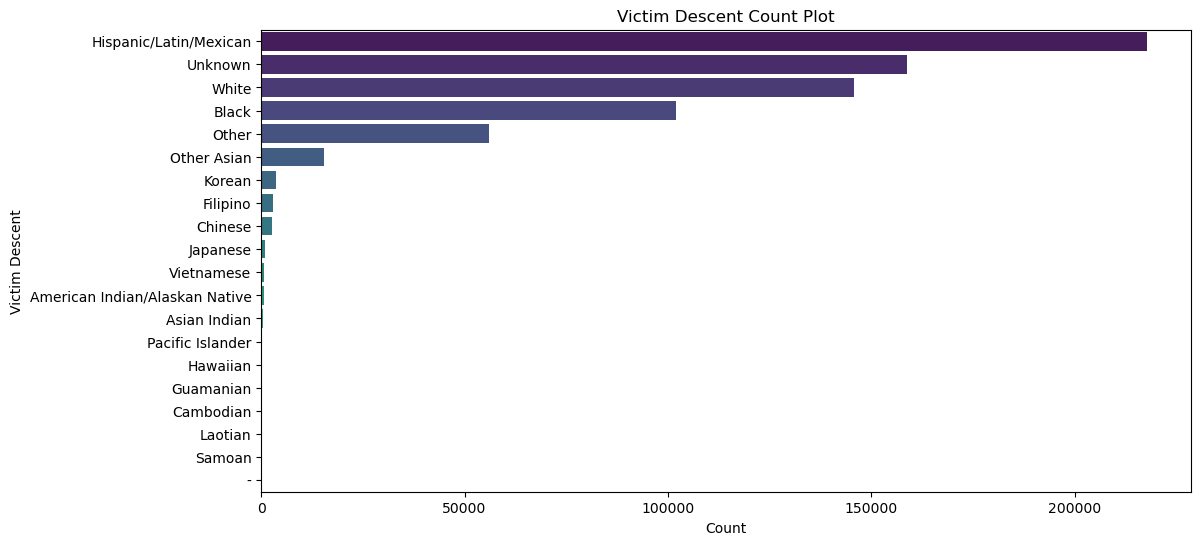

In [59]:

# Create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(y='Vict Descent', data=df_crime, order=race_count.index, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Victim Descent')
plt.title('Victim Descent Count Plot')
plt.show()

In [60]:
race_crime = df[df['Vict Descent'] == 'H']['Crm Cd Desc'].value_counts()
race_crime

BATTERY - SIMPLE ASSAULT                                    27645
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              20056
INTIMATE PARTNER - SIMPLE ASSAULT                           18714
THEFT OF IDENTITY                                           15481
BURGLARY FROM VEHICLE                                       13476
                                                            ...  
DISHONEST EMPLOYEE - PETTY THEFT                                1
INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES)                    1
BIGAMY                                                          1
TELEPHONE PROPERTY - DAMAGE                                     1
BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM        1
Name: Crm Cd Desc, Length: 128, dtype: int64

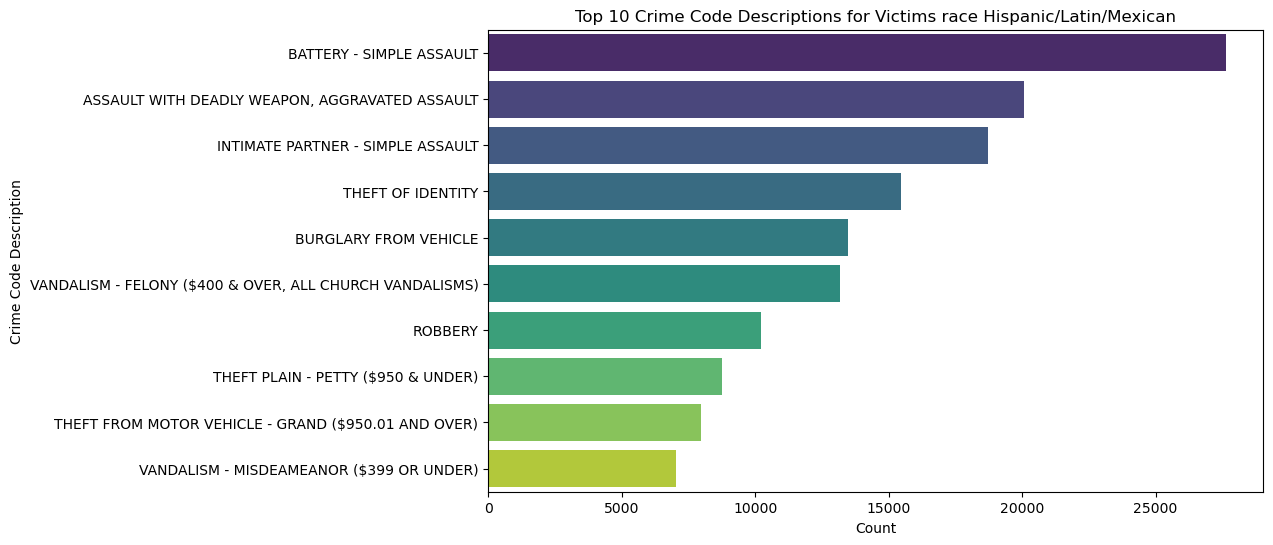

In [61]:
# Select the top 10 values
top_10_values = race_crime.head(10)

# Convert top 10 values Series to a DataFrame
top_10_df = top_10_values.reset_index()
top_10_df.columns = ['Crm Cd Desc', 'Count']

# Create a count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Crm Cd Desc', data=top_10_df, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Crime Code Description')
plt.title('Top 10 Crime Code Descriptions for Victims race Hispanic/Latin/Mexican')
plt.show()

In [62]:
grouped_data = df.groupby(['Vict Descent', 'Vict Sex'])['Crm Cd Desc'].value_counts()

# Select a specific combination (e.g., 'W' victim descent and 'M' victim sex)
race_crime_g = grouped_data['H', 'M']



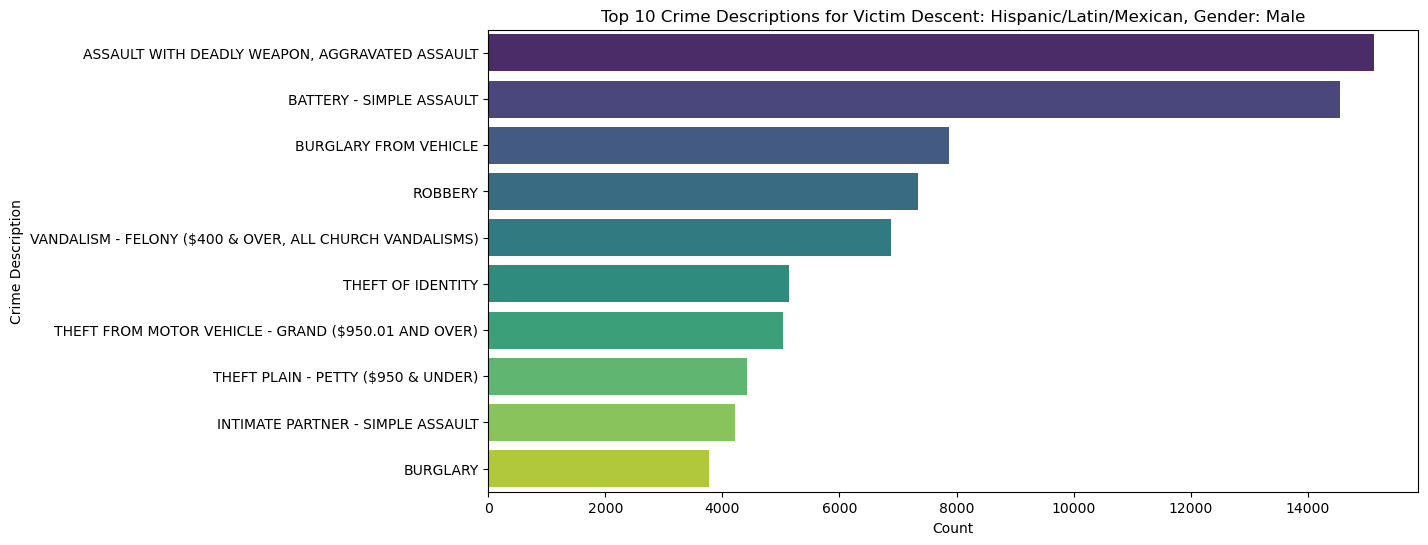

In [63]:
top_10_values = race_crime_g.head(10)

# Create a count plot for the top 10 crime descriptions
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_values.index, x=top_10_values.values, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Crime Description')
plt.title('Top 10 Crime Descriptions for Victim Descent: Hispanic/Latin/Mexican, Gender: Male')
plt.show()

In [64]:
grouped_data = df.groupby(['Vict Descent', 'Vict Sex'])['Crm Cd Desc'].value_counts()

# Select a specific combination (e.g., 'W' victim descent and 'M' victim sex)
race_crime_g1 = grouped_data['H', 'F']

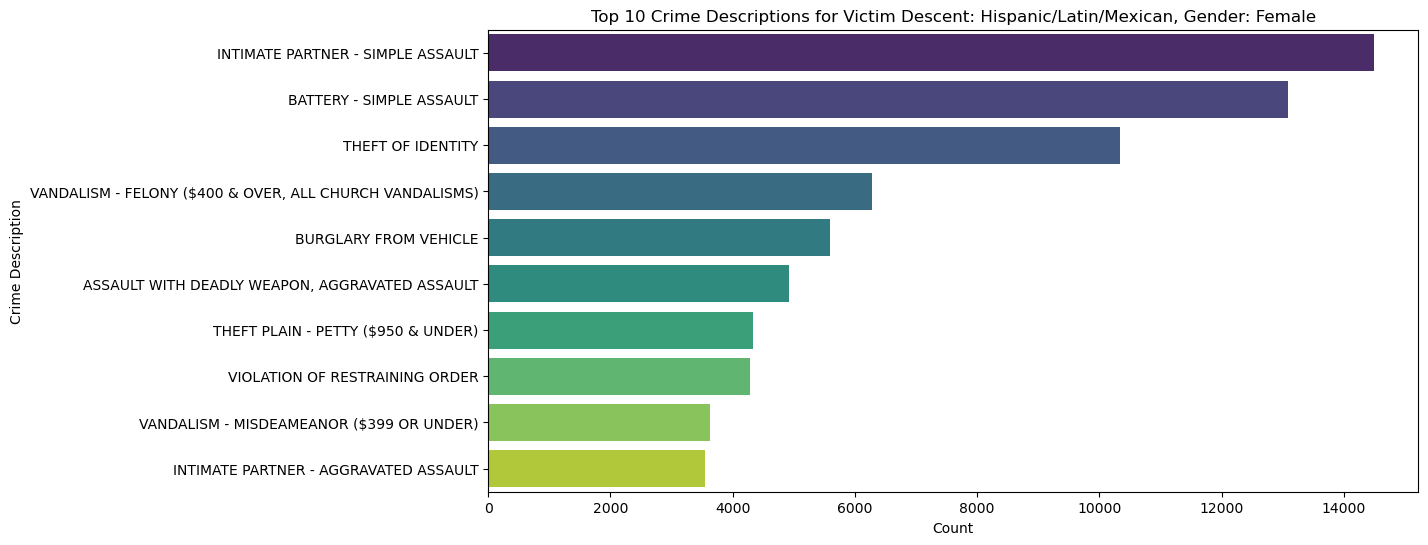

In [65]:
top_10_values = race_crime_g1.head(10)

# Create a count plot for the top 10 crime descriptions
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_values.index, x=top_10_values.values, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Crime Description')
plt.title('Top 10 Crime Descriptions for Victim Descent: Hispanic/Latin/Mexican, Gender: Female')
plt.show()

In [66]:
race_crime1 = df[df['Vict Descent'] == 'W']['Crm Cd Desc'].value_counts()
race_crime1

BURGLARY FROM VEHICLE                           14347
BURGLARY                                        13531
THEFT OF IDENTITY                               12492
THEFT PLAIN - PETTY ($950 & UNDER)              11311
BATTERY - SIMPLE ASSAULT                        10517
                                                ...  
TILL TAP - PETTY ($950 & UNDER)                     1
THEFT, COIN MACHINE - GRAND ($950.01 & OVER)        1
DISHONEST EMPLOYEE ATTEMPTED THEFT                  1
GRAND THEFT / INSURANCE FRAUD                       1
DISRUPT SCHOOL                                      1
Name: Crm Cd Desc, Length: 129, dtype: int64

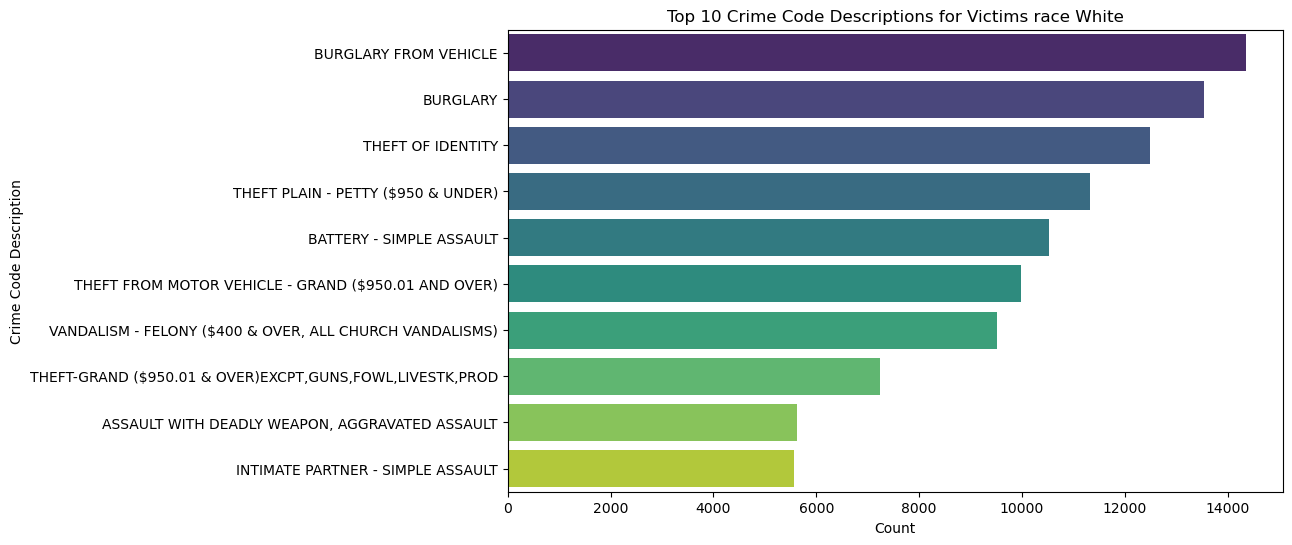

In [67]:
# Select the top 10 values
top_10_values = race_crime1.head(10)

# Convert top 10 values Series to a DataFrame
top_10_df = top_10_values.reset_index()
top_10_df.columns = ['Crm Cd Desc', 'Count']

# Create a count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Crm Cd Desc', data=top_10_df, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Crime Code Description')
plt.title('Top 10 Crime Code Descriptions for Victims race White')
plt.show()

In [68]:
grouped_data = df.groupby(['Vict Descent', 'Vict Sex'])['Crm Cd Desc'].value_counts()

# Select a specific combination (e.g., 'W' victim descent and 'M' victim sex)
race_crime_g2 = grouped_data['W', 'M']

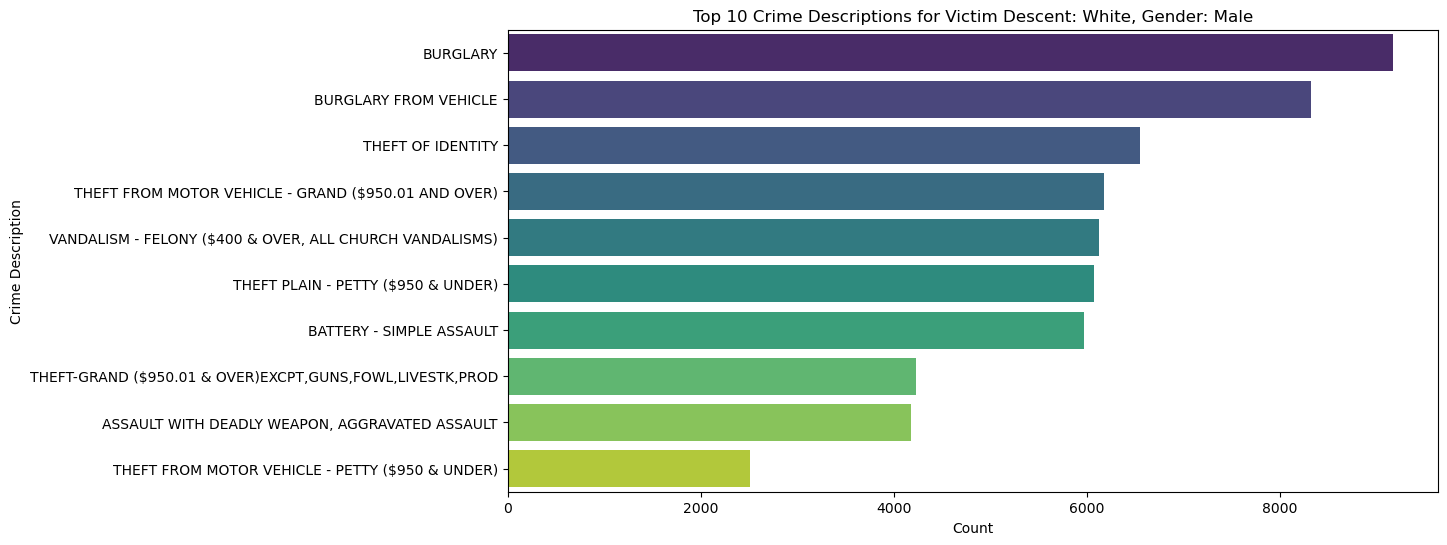

In [69]:
top_10_values = race_crime_g2.head(10)

# Create a count plot for the top 10 crime descriptions
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_values.index, x=top_10_values.values, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Crime Description')
plt.title('Top 10 Crime Descriptions for Victim Descent: White, Gender: Male')
plt.show()

In [70]:
grouped_data = df.groupby(['Vict Descent', 'Vict Sex'])['Crm Cd Desc'].value_counts()

# Select a specific combination (e.g., 'W' victim descent and 'M' victim sex)
race_crime_g3 = grouped_data['W', 'F']

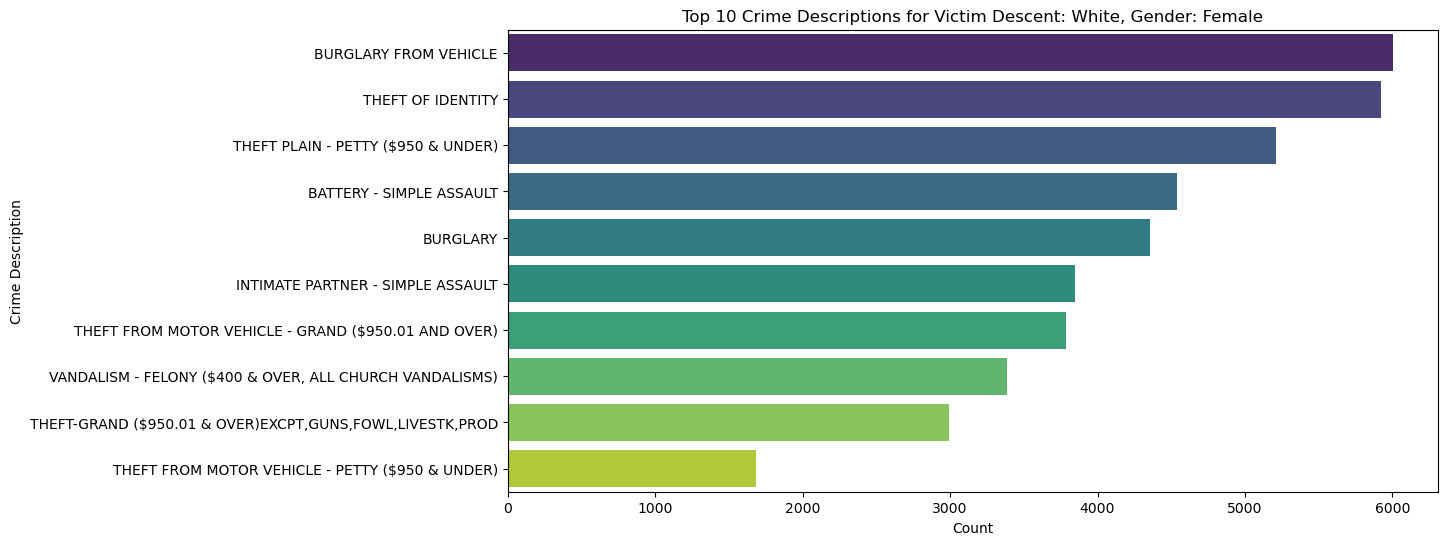

In [71]:
top_10_values = race_crime_g3.head(10)

# Create a count plot for the top 10 crime descriptions
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_values.index, x=top_10_values.values, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Crime Description')
plt.title('Top 10 Crime Descriptions for Victim Descent: White, Gender: Female')
plt.show()

In [72]:
race_crime2 = df[df['Vict Descent'] == 'B']['Crm Cd Desc'].value_counts()
race_crime2

ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              11137
BATTERY - SIMPLE ASSAULT                                    11062
THEFT OF IDENTITY                                           10712
INTIMATE PARTNER - SIMPLE ASSAULT                            8855
BURGLARY FROM VEHICLE                                        6338
                                                            ...  
REPLICA FIREARMS(SALE,DISPLAY,MANUFACTURE OR DISTRIBUTE)        1
BRIBERY                                                         1
MANSLAUGHTER, NEGLIGENT                                         1
TILL TAP - GRAND THEFT ($950.01 & OVER)                         1
TILL TAP - PETTY ($950 & UNDER)                                 1
Name: Crm Cd Desc, Length: 118, dtype: int64

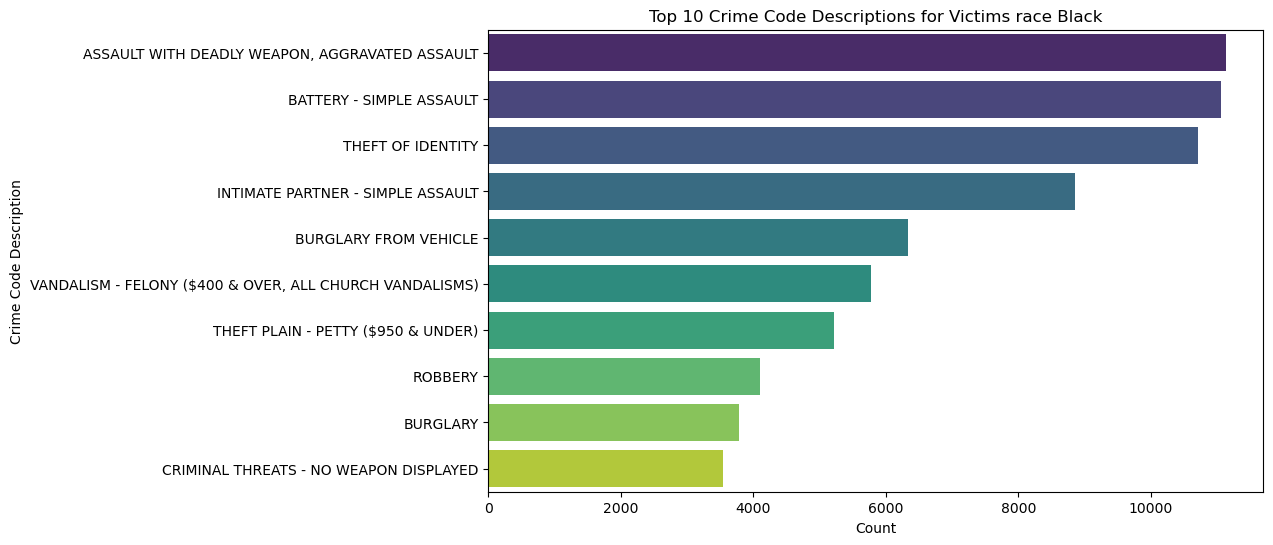

In [73]:
# Select the top 10 values
top_10_values = race_crime2.head(10)

# Convert top 10 values Series to a DataFrame
top_10_df = top_10_values.reset_index()
top_10_df.columns = ['Crm Cd Desc', 'Count']

# Create a count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Crm Cd Desc', data=top_10_df, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Crime Code Description')
plt.title('Top 10 Crime Code Descriptions for Victims race Black')
plt.show()

In [74]:
grouped_data=df.groupby(['Vict Descent','Vict Sex'])['Crm Cd Desc'].value_counts()
race_crime_g4 = grouped_data['B', 'M']

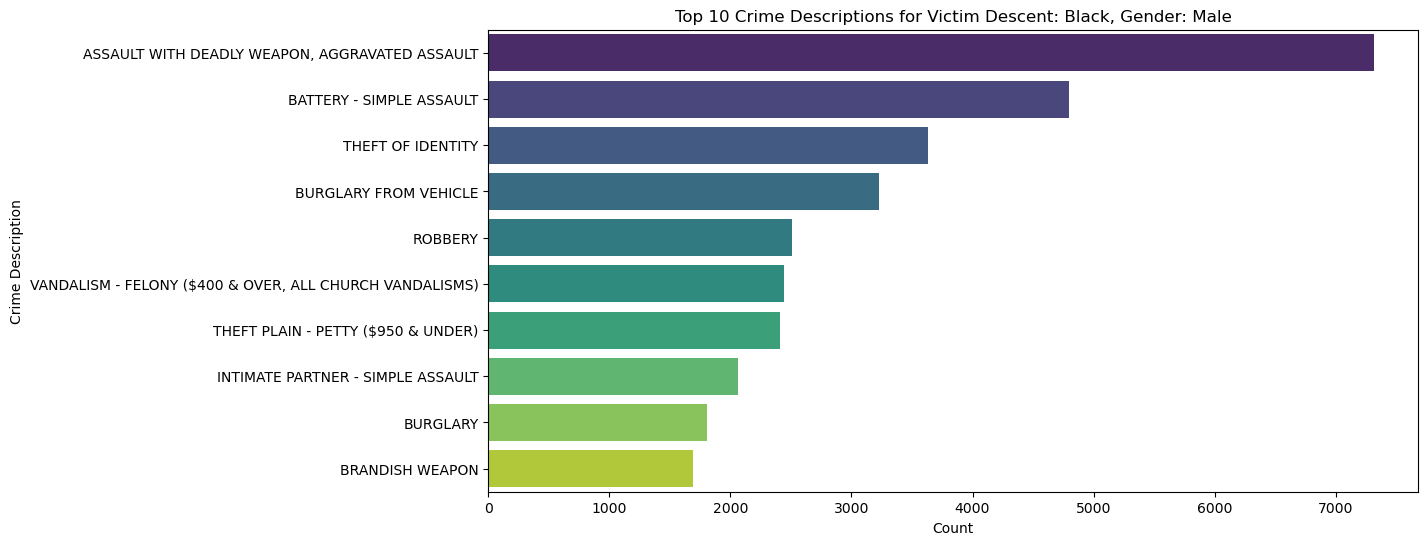

In [75]:
top_10_values = race_crime_g4.head(10)

# Create a count plot for the top 10 crime descriptions
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_values.index, x=top_10_values.values, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Crime Description')
plt.title('Top 10 Crime Descriptions for Victim Descent: Black, Gender: Male')
plt.show()

In [76]:
grouped_data=df.groupby(['Vict Descent','Vict Sex'])['Crm Cd Desc'].value_counts()
race_crime_g5 = grouped_data['B', 'F']

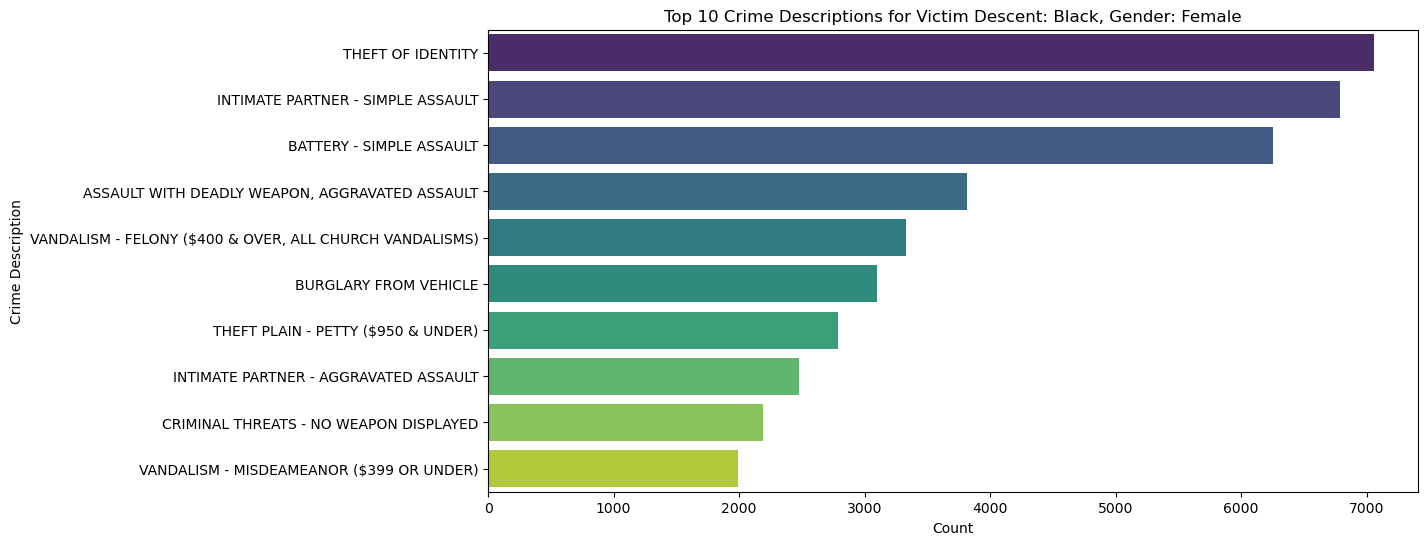

In [77]:
top_10_values = race_crime_g5.head(10)

# Create a count plot for the top 10 crime descriptions
plt.figure(figsize=(12, 6))
sns.barplot(y=top_10_values.index, x=top_10_values.values, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Crime Description')
plt.title('Top 10 Crime Descriptions for Victim Descent: Black, Gender: Female')
plt.show()

Now let's focus on predoiminant crime categories.

In [78]:
crime_type=df['Crm Cd Desc'].value_counts()

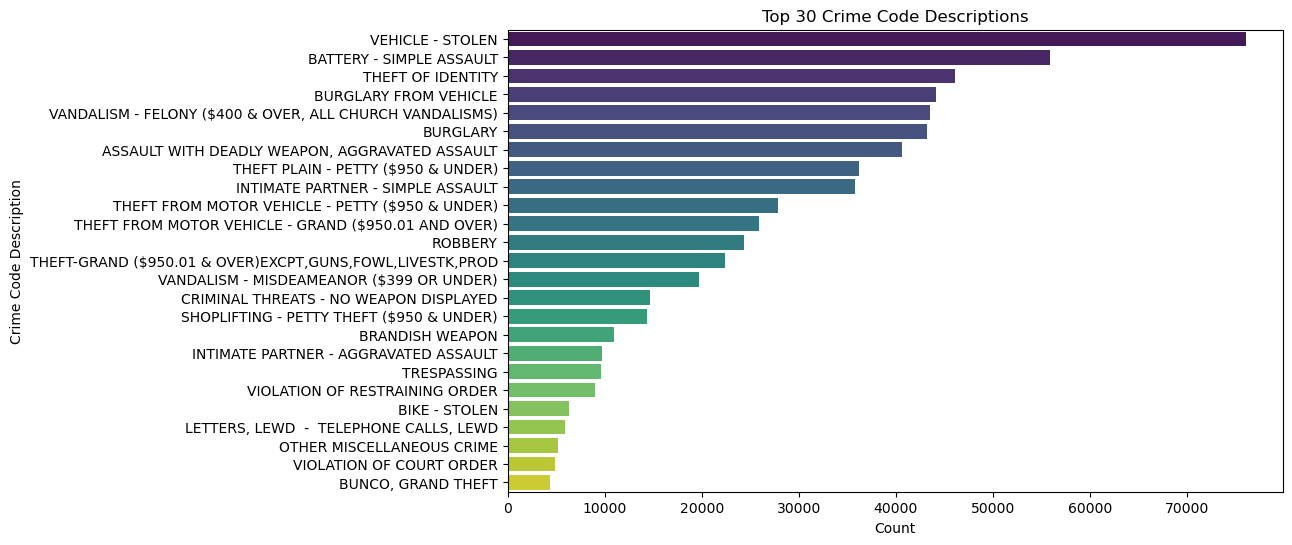

In [79]:
# Select the top 10 values
top_10_values = crime_type.head(25)

# Convert top 10 values Series to a DataFrame
top_10_df = top_10_values.reset_index()
top_10_df.columns = ['Crm Cd Desc', 'Count']

# Create a count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Crm Cd Desc', data=top_10_df, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Crime Code Description')
plt.title('Top 30 Crime Code Descriptions')
plt.show()

**Now let's explore the sub categories of crimes committed. As described in the dataset, Crm Cd 1 : Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.**



In [80]:
df['Crm Cd 1'].value_counts()

510.0    76051
624.0    56102
354.0    46071
330.0    44187
740.0    43641
         ...  
349.0        3
884.0        2
445.0        2
430.0        1
882.0        1
Name: Crm Cd 1, Length: 140, dtype: int64

In [81]:
df['Crm Cd 2'].value_counts()

998.0    42143
930.0     2901
860.0      990
761.0      721
626.0      713
         ...  
473.0        1
943.0        1
445.0        1
942.0        1
865.0        1
Name: Crm Cd 2, Length: 120, dtype: int64

*From the description of codes it is clear that the crimes are coded into specific digits.So let's visualize the offence  with their codes.*

In [82]:
crime_codes = ['Crm Cd', 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4']
crime_codes_pct = []

for crm in crime_codes:
    total_crm = df_crime[crm].value_counts().sum()
    crime_codes_pct.append(total_crm)

# Get percentages of indicated crimes
pct_crm = []
for i in range(len(crime_codes)):
    pct = (crime_codes_pct[i] / crime_codes_pct[0]) * 100
    pct_crm.append(pct)

# Creating a new DataFrame
list_of_tuples = list(zip(crime_codes, crime_codes_pct, pct_crm))
df_crime_codes = pd.DataFrame(list_of_tuples, columns=['Crime code', 'Value', 'Percentage'])


In [83]:
df_crime_codes

Crime code   Value  Percentage
0     Crm Cd  708084  100.000000
1   Crm Cd 1  708075   99.998729
2   Crm Cd 2   52707    7.443608
3   Crm Cd 3    1774    0.250535
4   Crm Cd 4      54    0.007626

The data set says that Crm Cd and Crm Cd1 are same however there is a difference of 9 values in them. There are missing values in the crime codes. 

In [84]:
print(df['Crm Cd'].unique())
print(df['Crm Cd 1'].unique())


[624 845 745 740 121 442 946 341 330 930 648 626 440 354 210 230 310 510
 420 761 236 662 350 860 480 623 956 900 888 331 901 886 421 647 940 810
 922 812 220 625 755 649 815 251 320 890 850 820 668 902 664 920 343 437
 753 928 910 760 762 661 351 821 237 903 813 666 627 805 763 441 122 443
 450 520 434 410 670 951 660 654 352 250 110 652 933 950 231 345 822 814
 932 622 471 235 470 921 906 433 651 806 943 653 436 949 446 113 487 438
 451 439 485 944 954 756 942 473 347 435 880 444 475 474 931 865 349 353
 452 870 522 924 840 948 884 904 830 445 432 882]
[624. 845. 745. 740. 121. 442. 946. 341. 330. 930. 648. 626. 440. 354.
 210. 230. 310. 510. 420. 761. 236. 662. 350. 860. 480. 623. 956. 900.
 888. 331. 901. 886. 421. 647. 940. 810. 922. 812. 220. 625. 755. 649.
 434. 815. 251. 320. 890. 850. 668. 902. 664. 920. 343. 437. 753. 928.
 910. 760. 762. 661. 351. 821. 237. 903. 813. 666. 820. 627. 805. 763.
 441. 122. 443. 450. 520. 410. 670. 951. 660. 654. 352. 250. 110. 652.
 933. 950. 23

In [85]:
df1=df.copy()

In [86]:
diff_rows = df[df['Crm Cd'] != df['Crm Cd 1']]
print(diff_rows[['Crm Cd', 'Crm Cd 1']])

        Crm Cd  Crm Cd 1
290        626     434.0
313        815     310.0
526        820     812.0
1541       761     753.0
2813       812     627.0
...        ...       ...
704709     761     624.0
705647     520     330.0
705698     761     626.0
706498     623     437.0
707474     761     624.0

[1475 rows x 2 columns]


In [87]:
#Checking a single row
row_index = 706498  
single_row = df.iloc[row_index]
print(single_row)

DR_NO                                           231305130
Date Rptd                          01/23/2023 12:00:00 AM
DATE OCC                           01/23/2023 12:00:00 AM
TIME OCC                                             1020
AREA                                                   13
AREA NAME                                          Newton
Rpt Dist No                                          1345
Part 1-2                                                2
Crm Cd                                                623
Crm Cd Desc                       BATTERY POLICE (SIMPLE)
Mocodes                                    0447 2004 1212
Vict Age                                                0
Vict Sex                                                X
Vict Descent                                            X
Premis Cd                                           726.0
Premis Desc                               POLICE FACILITY
Weapon Used Cd                                      500.0
Weapon Desc   

**This comparison shows that there are 1475 cases in which crime codes are not same. By analysis we see that instead of
Crm Cd 1 the code has been written in Crm Cd 2. We will try to categorize the offences by Crm Cd then we will match them with Crm Cd 1.**

In [88]:
selected_columns = df[['Crm Cd', 'Crm Cd Desc']].value_counts()
print(selected_columns)

Crm Cd  Crm Cd Desc                                            
510     VEHICLE - STOLEN                                           76059
624     BATTERY - SIMPLE ASSAULT                                   55851
354     THEFT OF IDENTITY                                          46061
330     BURGLARY FROM VEHICLE                                      44148
740     VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)    43562
                                                                   ...  
452     PICKPOCKET, ATTEMPT                                            3
445     DISHONEST EMPLOYEE ATTEMPTED THEFT                             2
884     FAILURE TO DISPERSE                                            2
349     GRAND THEFT / AUTO REPAIR                                      2
882     INCITING A RIOT                                                1
Length: 138, dtype: int64


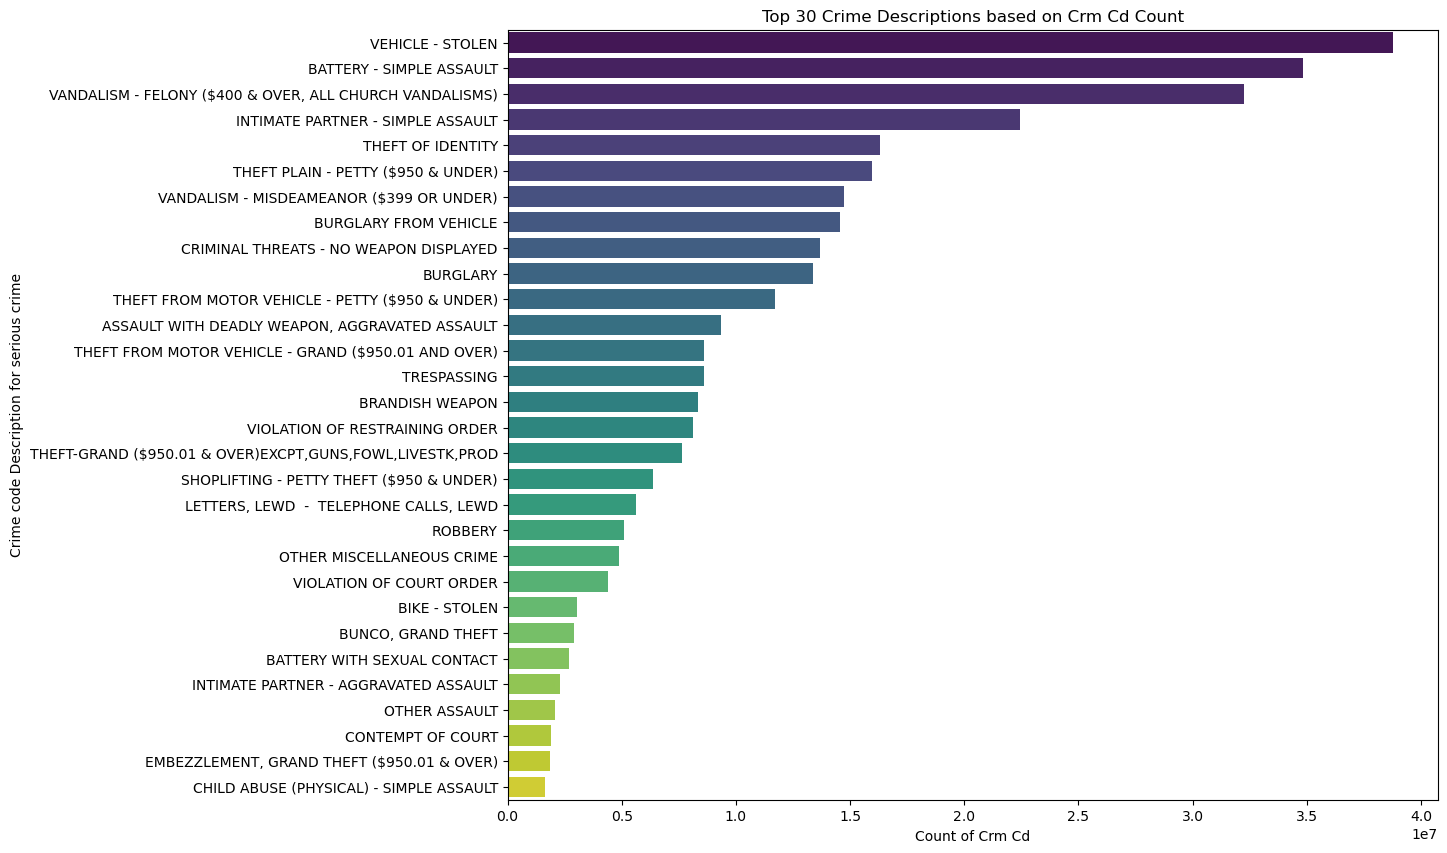

In [89]:
# Group by 'Crm Cd Desc' and calculate the counts
crime_counts_by_desc = df.groupby('Crm Cd Desc').sum()

# Reset the index to have 'Crm Cd Desc' as a column
crime_counts_by_desc.reset_index(inplace=True)

# Sort the data by counts in descending order
crime_counts_by_desc = crime_counts_by_desc.sort_values(by='Crm Cd', ascending=False)

# Select the top 30 crime descriptions
top_30_crime_counts = crime_counts_by_desc.head(30)

# Create a bar plot for the top 30 'Crm Cd Desc' based on the count of 'Crm Cd'
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.barplot(y='Crm Cd Desc', x='Crm Cd', data=top_30_crime_counts, palette='viridis')
plt.xlabel('Count of Crm Cd')
plt.ylabel('Crime code Description for serious crime')
plt.title('Top 30 Crime Descriptions based on Crm Cd Count')
plt.show()

In [90]:
selected_columns = df[['Crm Cd 1', 'Crm Cd Desc']].value_counts()
print(selected_columns)

Crm Cd 1  Crm Cd Desc                                             
510.0     VEHICLE - STOLEN                                            76046
624.0     BATTERY - SIMPLE ASSAULT                                    55841
354.0     THEFT OF IDENTITY                                           46061
330.0     BURGLARY FROM VEHICLE                                       44147
740.0     VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     43561
                                                                      ...  
625.0     CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)        1
812.0     KIDNAPPING - GRAND ATTEMPT                                      1
625.0     INDECENT EXPOSURE                                               1
810.0     ORAL COPULATION                                                 1
625.0     KIDNAPPING                                                      1
Length: 281, dtype: int64


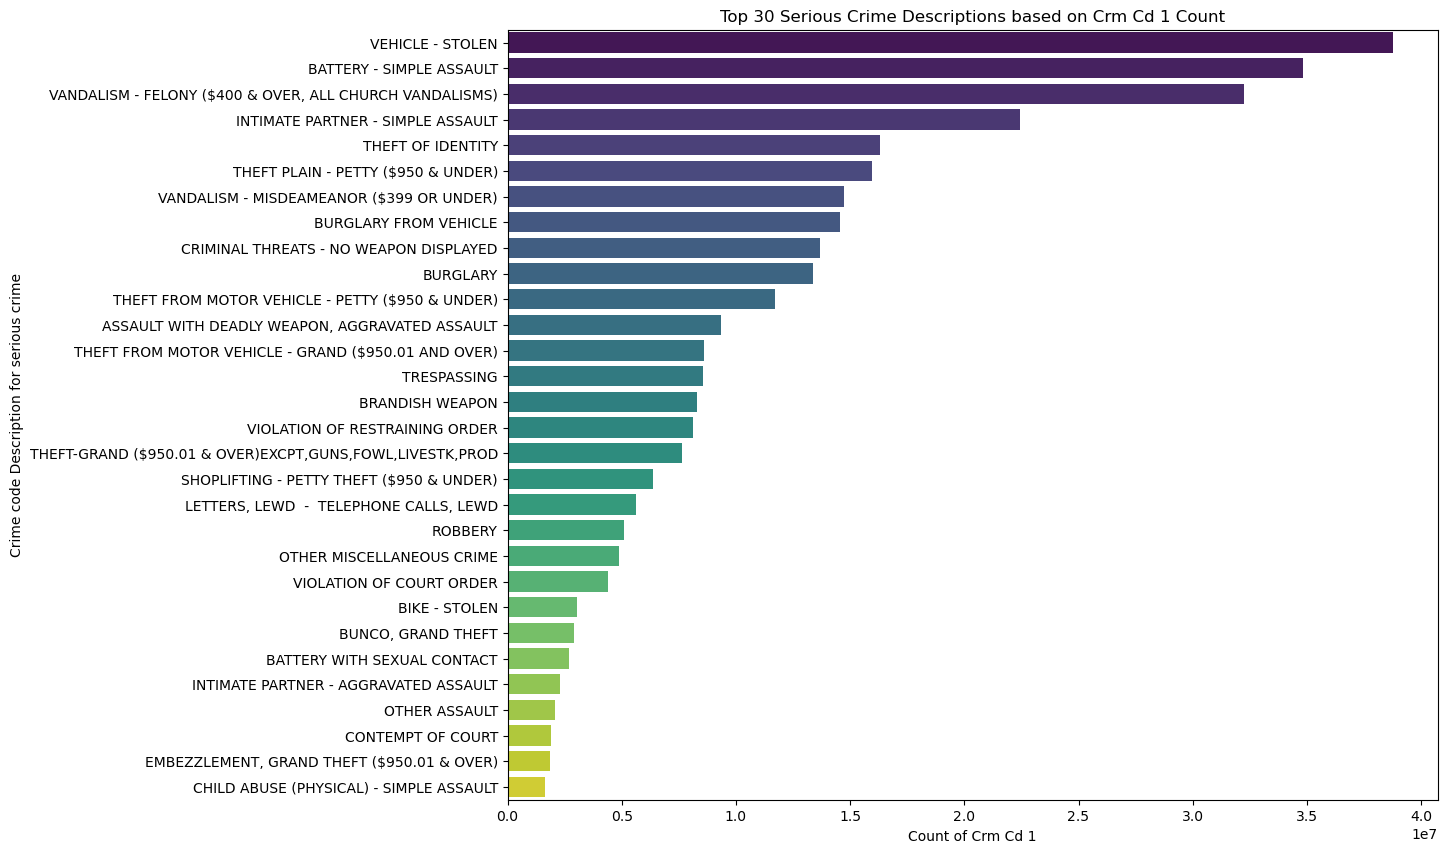

In [91]:
# Group by 'Crm Cd Desc' and calculate the counts
crime_counts_by_desc = df.groupby('Crm Cd Desc').sum()

# Reset the index to have 'Crm Cd Desc' as a column
crime_counts_by_desc.reset_index(inplace=True)

# Sort the data by counts in descending order
crime_counts_by_desc = crime_counts_by_desc.sort_values(by='Crm Cd 1', ascending=False)

# Select the top 30 crime descriptions
top_30_crime_counts = crime_counts_by_desc.head(30)

# Create a bar plot for the top 30 'Crm Cd Desc' based on the count of 'Crm Cd'
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.barplot(y='Crm Cd Desc', x='Crm Cd 1', data=top_30_crime_counts, palette='viridis')
plt.xlabel('Count of Crm Cd 1')
plt.ylabel('Crime code Description for serious crime')
plt.title('Top 30 Serious Crime Descriptions based on Crm Cd 1 Count')
plt.show()

In [92]:
selected_columns = df[['Crm Cd 2', 'Crm Cd Desc']].value_counts()
print(selected_columns)

Crm Cd 2  Crm Cd Desc                                             
998.0     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              8929
          BURGLARY                                                    5456
          ROBBERY                                                     3079
          VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     2806
930.0     BRANDISH WEAPON                                             2381
                                                                      ... 
860.0     THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD       1
          SEXUAL PENETRATION W/FOREIGN OBJECT                            1
          SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ       1
          RAPE, FORCIBLE                                                 1
999.0     VIOLATION OF TEMPORARY RESTRAINING ORDER                       1
Length: 804, dtype: int64


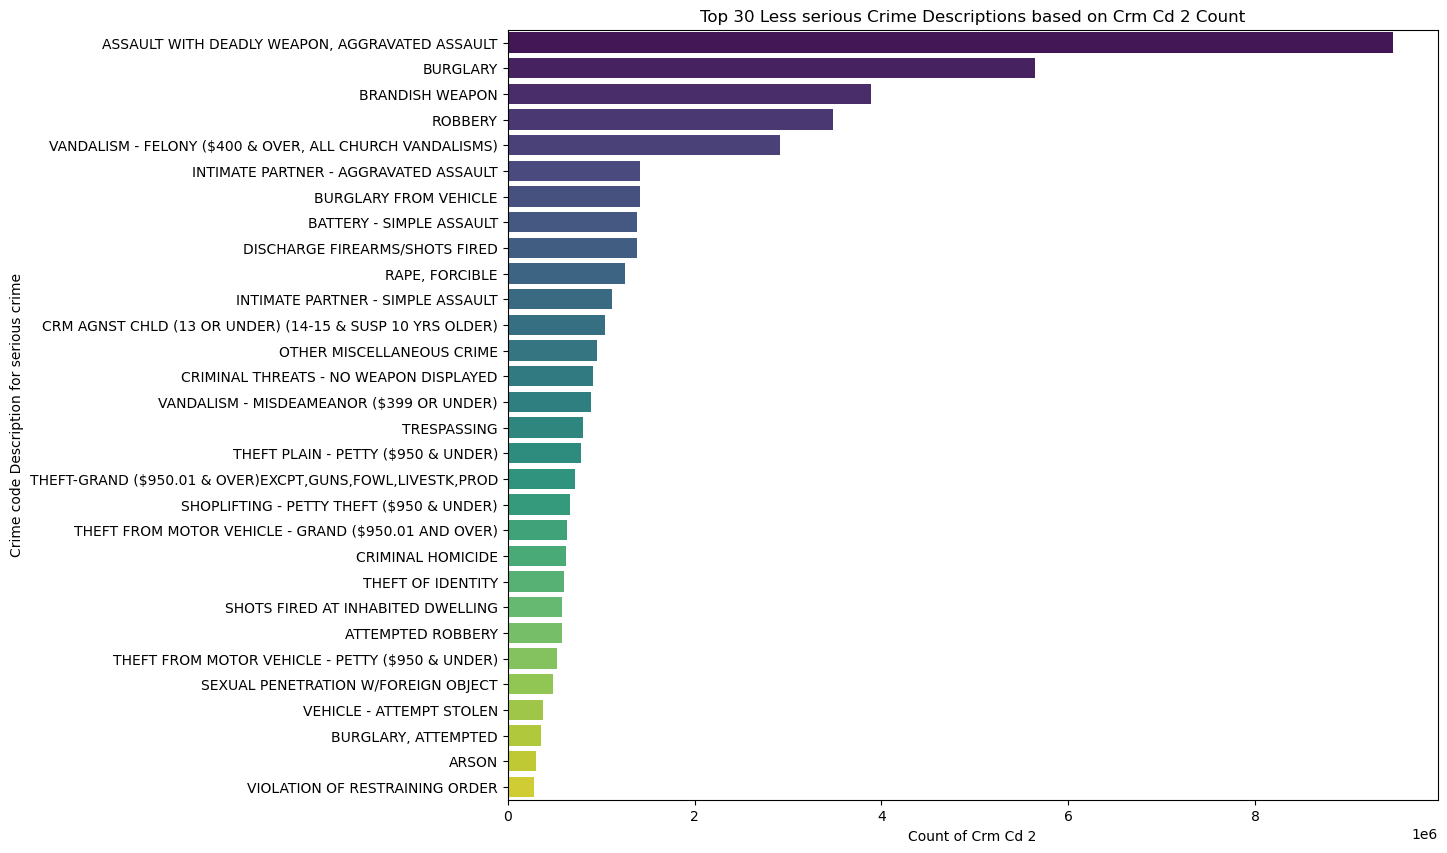

In [93]:
# Group by 'Crm Cd Desc' and calculate the counts
crime_counts_by_desc = df.groupby('Crm Cd Desc').sum()

# Reset the index to have 'Crm Cd Desc' as a column
crime_counts_by_desc.reset_index(inplace=True)

# Sort the data by counts in descending order
crime_counts_by_desc = crime_counts_by_desc.sort_values(by='Crm Cd 2', ascending=False)

# Select the top 30 crime descriptions
top_30_crime_counts = crime_counts_by_desc.head(30)

# Create a bar plot for the top 30 'Crm Cd Desc' based on the count of 'Crm Cd'
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.barplot(y='Crm Cd Desc', x='Crm Cd 2', data=top_30_crime_counts, palette='viridis')
plt.xlabel('Count of Crm Cd 2')
plt.ylabel('Crime code Description for serious crime')
plt.title('Top 30 Less serious Crime Descriptions based on Crm Cd 2 Count')
plt.show()

In [94]:
selected_columns = df[['Crm Cd 3', 'Crm Cd Desc']].value_counts()
print(selected_columns)

Crm Cd 3  Crm Cd Desc                                             
998.0     BRANDISH WEAPON                                             628
          ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              155
          RAPE, FORCIBLE                                              133
          ROBBERY                                                     114
          CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)     79
                                                                     ... 
910.0     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                1
906.0     CRIMINAL HOMICIDE                                             1
903.0     BURGLARY                                                      1
902.0     BATTERY - SIMPLE ASSAULT                                      1
999.0     VANDALISM - MISDEAMEANOR ($399 OR UNDER)                      1
Length: 154, dtype: int64


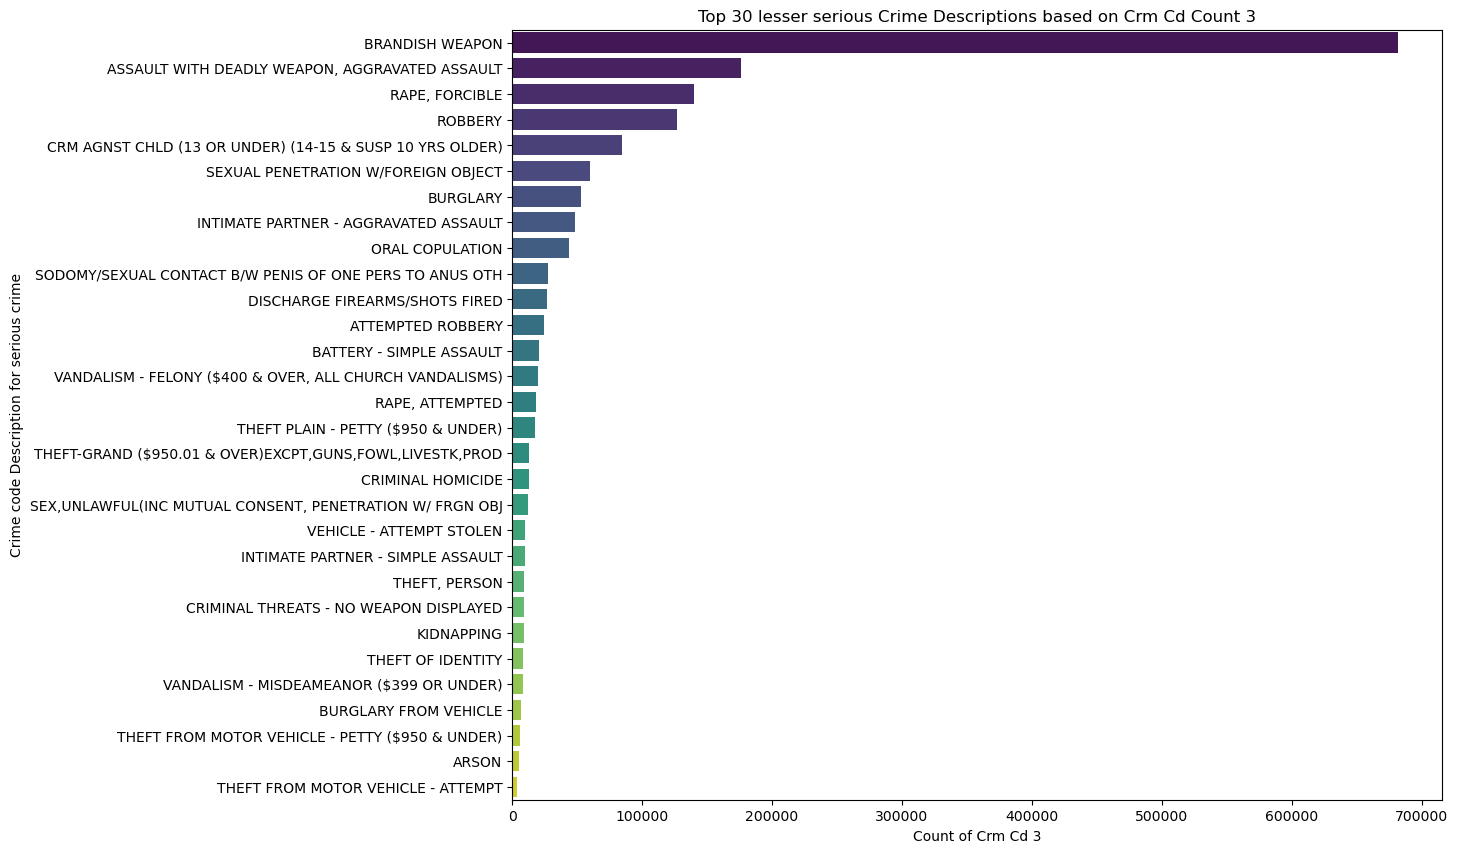

In [95]:
# Group by 'Crm Cd Desc' and calculate the counts
crime_counts_by_desc = df.groupby('Crm Cd Desc').sum()

# Reset the index to have 'Crm Cd Desc' as a column
crime_counts_by_desc.reset_index(inplace=True)

# Sort the data by counts in descending order
crime_counts_by_desc = crime_counts_by_desc.sort_values(by='Crm Cd 3', ascending=False)

# Select the top 30 crime descriptions
top_30_crime_counts = crime_counts_by_desc.head(30)

# Create a bar plot for the top 30 'Crm Cd Desc' based on the count of 'Crm Cd'
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.barplot(y='Crm Cd Desc', x='Crm Cd 3', data=top_30_crime_counts, palette='viridis')
plt.xlabel('Count of Crm Cd 3')
plt.ylabel('Crime code Description for serious crime')
plt.title('Top 30 lesser serious Crime Descriptions based on Crm Cd Count 3')
plt.show()

In [96]:
selected_columns = df[['Crm Cd 4', 'Crm Cd Desc']].value_counts()
print(selected_columns)

Crm Cd 4  Crm Cd Desc                                             
998.0     BRANDISH WEAPON                                             15
          BATTERY - SIMPLE ASSAULT                                     5
          ROBBERY                                                      4
          RAPE, FORCIBLE                                               4
          INTIMATE PARTNER - AGGRAVATED ASSAULT                        4
          SEXUAL PENETRATION W/FOREIGN OBJECT                          3
          RAPE, ATTEMPTED                                              3
          ORAL COPULATION                                              2
          ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               2
821.0     ORAL COPULATION                                              1
998.0     THEFT OF IDENTITY                                            1
          SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH      1
          CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 Y

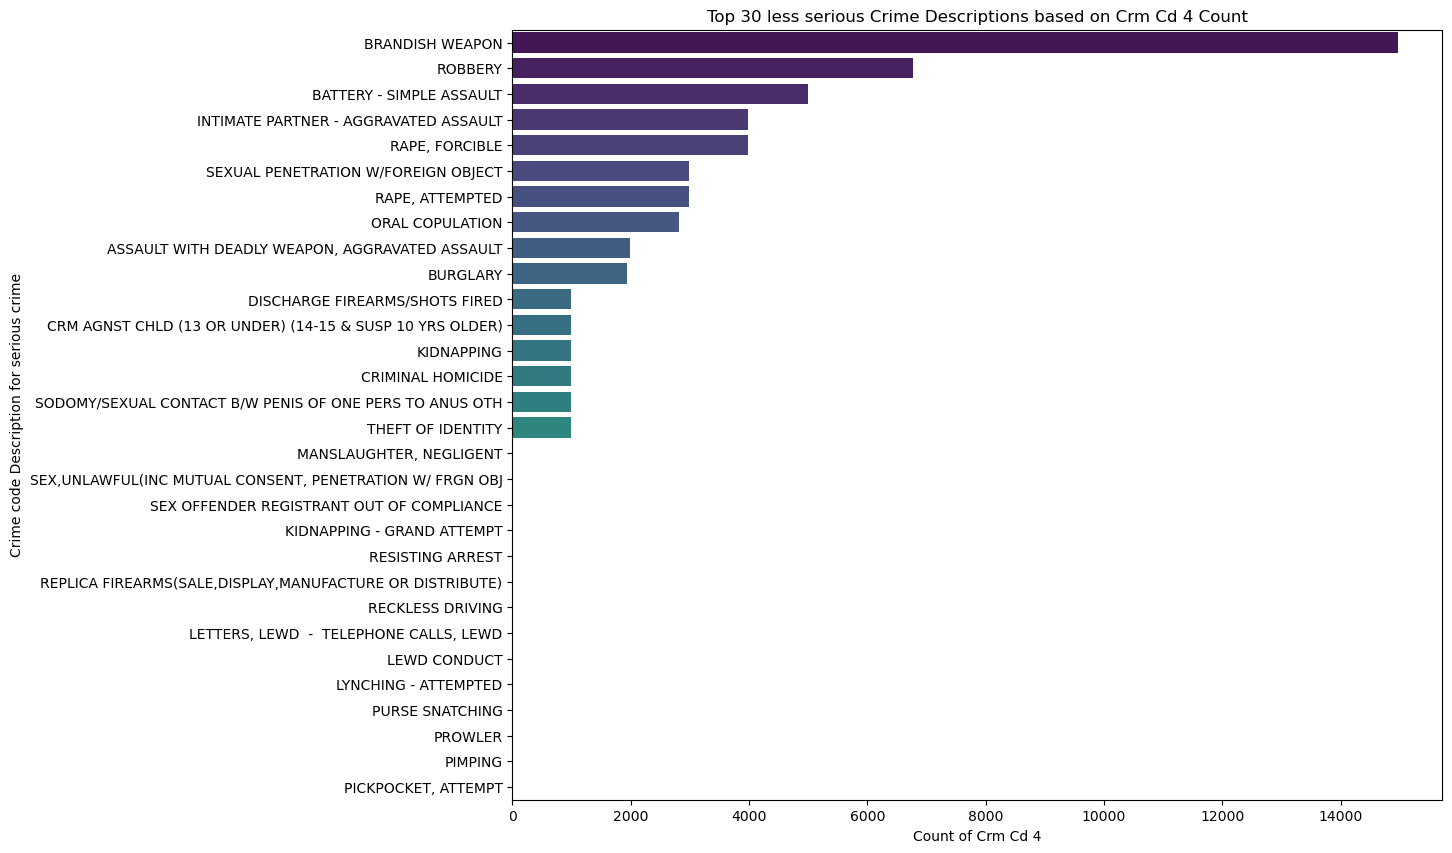

In [97]:
# Group by 'Crm Cd Desc' and calculate the counts
crime_counts_by_desc = df.groupby('Crm Cd Desc').sum()

# Reset the index to have 'Crm Cd Desc' as a column
crime_counts_by_desc.reset_index(inplace=True)

# Sort the data by counts in descending order
crime_counts_by_desc = crime_counts_by_desc.sort_values(by='Crm Cd 4', ascending=False)

# Select the top 30 crime descriptions
top_30_crime_counts = crime_counts_by_desc.head(30)

# Create a bar plot for the top 30 'Crm Cd Desc' based on the count of 'Crm Cd'
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.barplot(y='Crm Cd Desc', x='Crm Cd 4', data=top_30_crime_counts, palette='viridis')
plt.xlabel('Count of Crm Cd 4')
plt.ylabel('Crime code Description for serious crime')
plt.title('Top 30 less serious Crime Descriptions based on Crm Cd 4 Count')
plt.show()

In [98]:


# Select rows where all four features are present (no missing values)
filtered_df = df.dropna(subset=['Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4'])
filtered_df.info() 



<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 1541 to 695972
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DR_NO           54 non-null     int64  
 1   Date Rptd       54 non-null     object 
 2   DATE OCC        54 non-null     object 
 3   TIME OCC        54 non-null     int64  
 4   AREA            54 non-null     int64  
 5   AREA NAME       54 non-null     object 
 6   Rpt Dist No     54 non-null     int64  
 7   Part 1-2        54 non-null     int64  
 8   Crm Cd          54 non-null     int64  
 9   Crm Cd Desc     54 non-null     object 
 10  Mocodes         54 non-null     object 
 11  Vict Age        54 non-null     int64  
 12  Vict Sex        54 non-null     object 
 13  Vict Descent    54 non-null     object 
 14  Premis Cd       54 non-null     float64
 15  Premis Desc     54 non-null     object 
 16  Weapon Used Cd  51 non-null     float64
 17  Weapon Desc     51 non-null   

In [99]:
df.iloc[1541]

DR_NO                                                200619489
Date Rptd                               12/21/2020 12:00:00 AM
DATE OCC                                12/21/2020 12:00:00 AM
TIME OCC                                                   300
AREA                                                         6
AREA NAME                                            Hollywood
Rpt Dist No                                                668
Part 1-2                                                     1
Crm Cd                                                     761
Crm Cd Desc                                    BRANDISH WEAPON
Mocodes                0450 0913 1100 0334 1407 0603 0421 0353
Vict Age                                                    51
Vict Sex                                                     M
Vict Descent                                                 B
Premis Cd                                                502.0
Premis Desc       MULTI-UNIT DWELLING (APARTMENT, DUPLE

Now let's investigate the status of the cases. According to the Status code provided status of a code is divided into 6 categories. 

In [100]:
status_code=df['Status'].value_counts()

In [101]:
status_condition=df['Status Desc'].value_counts()
status_condition

Invest Cont     566243
Adult Other      76655
Adult Arrest     61824
Juv Arrest        2208
Juv Other         1151
UNK                  3
Name: Status Desc, dtype: int64

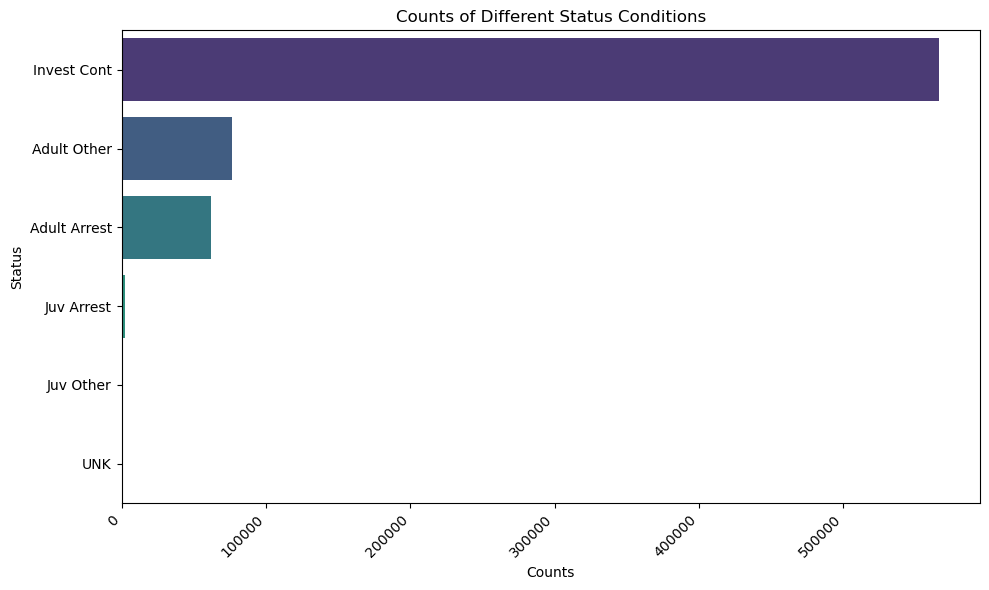

In [102]:
plt.figure(figsize=(10, 6))
sns.barplot(y=status_condition.index, x=status_condition.values, palette='viridis')

# Adding labels and title
plt.ylabel('Status')
plt.xlabel('Counts')
plt.title('Counts of Different Status Conditions')

# Rotating x-labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()








In [103]:
# Step 1: Calculate the value counts of 'Status Desc'
status_condition = df['Status Desc'].value_counts()

# Step 2: Create a DataFrame from the value counts
status_condition_df = pd.DataFrame({'Status Desc': status_condition.index, 'Count': status_condition.values})

# Step 3: Create the pie plot using Plotly Express
fig = px.pie(status_condition_df, names='Status Desc', values='Count',
             title='Distribution of Status', hole=0.4)

# Show the plot
fig.show()

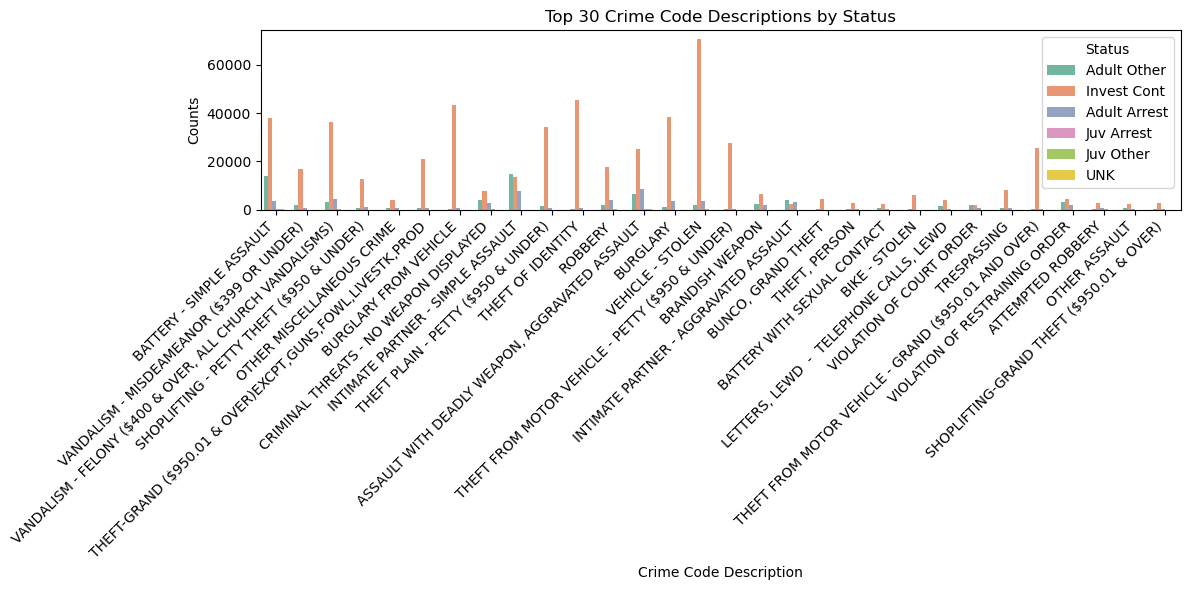

In [104]:
# Get the top 30 values of 'Crm Cd Desc'
top_crime_codes = df['Crm Cd Desc'].value_counts().head(30).index

# Filter the DataFrame to include only the top 30 crime codes
filtered_df = df[df['Crm Cd Desc'].isin(top_crime_codes)]

# Create a count plot using Seaborn
plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, x='Crm Cd Desc', hue='Status Desc', palette='Set2')

# Adding labels and title
plt.xlabel('Crime Code Description')
plt.ylabel('Counts')
plt.title('Top 30 Crime Code Descriptions by Status')

# Rotating x-labels for better readability
plt.xticks(rotation=45, ha='right')

# Adding a legend
plt.legend(title='Status', loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()

Now let's investigate the weapons used in the crime

In [105]:
df['Weapon Desc'].unique()

array(['STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
       'UNKNOWN WEAPON/OTHER WEAPON', nan, 'ROCK/THROWN OBJECT',
       'VERBAL THREAT', 'FOLDING KNIFE', 'BLUNT INSTRUMENT', 'BOTTLE',
       'SEMI-AUTOMATIC PISTOL', 'CLUB/BAT', 'OTHER CUTTING INSTRUMENT',
       'HAND GUN', 'PHYSICAL PRESENCE', 'VEHICLE', 'SCISSORS', 'STICK',
       'MACHETE', 'OTHER KNIFE', 'SHOTGUN', 'ICE PICK',
       'KNIFE WITH BLADE 6INCHES OR LESS', 'FIRE', 'GLASS',
       'SIMULATED GUN', 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH',
       'DEMAND NOTE', 'BOMB THREAT', 'PIPE/METAL PIPE', 'UNKNOWN FIREARM',
       'MACE/PEPPER SPRAY', 'HAMMER', 'RAZOR', 'OTHER FIREARM',
       'BELT FLAILING INSTRUMENT/CHAIN',
       'UNKNOWN TYPE CUTTING INSTRUMENT', 'SCREWDRIVER', 'KITCHEN KNIFE',
       'AIR PISTOL/REVOLVER/RIFLE/BB GUN', 'BRASS KNUCKLES', 'REVOLVER',
       'SWITCH BLADE', 'STUN GUN', 'AXE', 'RIFLE',
       'ASSAULT WEAPON/UZI/AK47/ETC', 'ANTIQUE FIREARM', 'FIXED OBJECT',
       'SEMI-AUTOMATIC RIFLE

In [106]:
df['Weapon Desc'].value_counts()

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    132141
UNKNOWN WEAPON/OTHER WEAPON                        25297
VERBAL THREAT                                      18090
HAND GUN                                           15215
SEMI-AUTOMATIC PISTOL                               5667
                                                   ...  
MAC-11 SEMIAUTOMATIC ASSAULT WEAPON                    3
MAC-10 SEMIAUTOMATIC ASSAULT WEAPON                    2
M1-1 SEMIAUTOMATIC ASSAULT RIFLE                       1
HECKLER & KOCH 91 SEMIAUTOMATIC ASSAULT RIFLE          1
M-14 SEMIAUTOMATIC ASSAULT RIFLE                       1
Name: Weapon Desc, Length: 79, dtype: int64

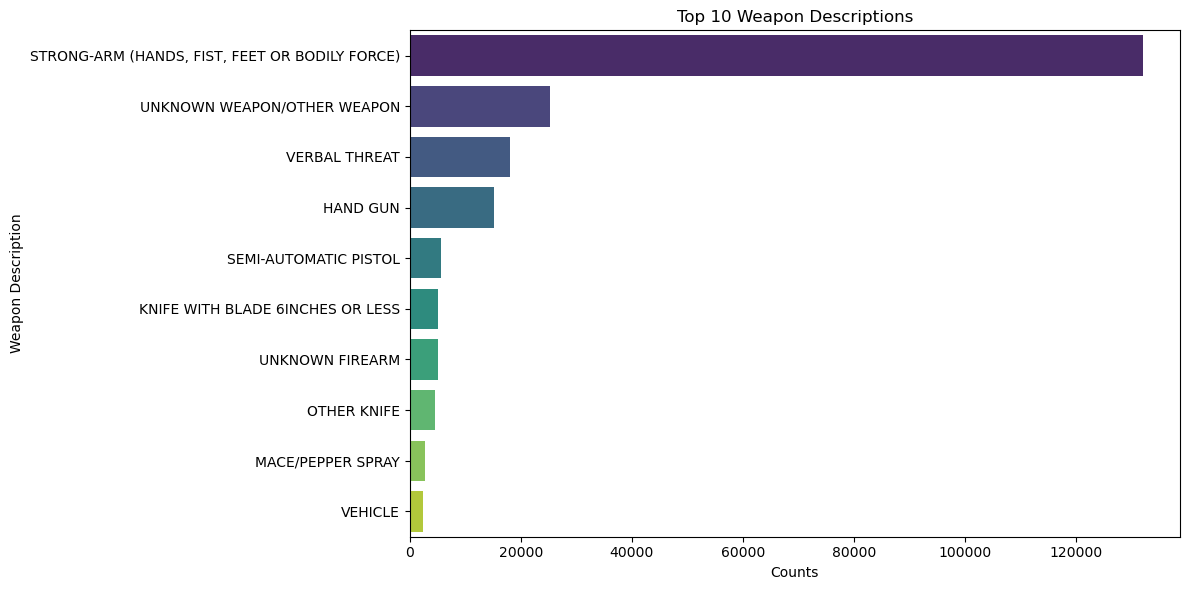

In [107]:
# Get the top 10 values of 'Weapon Desc'
top_weapon_desc = df['Weapon Desc'].value_counts().head(10)

# Create a count plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(y=top_weapon_desc.index, x=top_weapon_desc.values, palette='viridis')

# Adding labels and title
plt.ylabel('Weapon Description')
plt.xlabel('Counts')
plt.title('Top 10 Weapon Descriptions')

# Rotating x-labels for better readability
#plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [108]:
# Grouping 'Crm Cd Desc' by 'Weapon Desc' and counting occurrences
grouped_data = df.groupby('Weapon Desc')['Crm Cd Desc'].value_counts()

# Displaying the grouped data
grouped_data

Weapon Desc                       Crm Cd Desc                                            
AIR PISTOL/REVOLVER/RIFLE/BB GUN  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             946
                                  BRANDISH WEAPON                                            242
                                  ROBBERY                                                     86
                                  INTIMATE PARTNER - AGGRAVATED ASSAULT                       47
                                  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     38
                                                                                            ... 
VERBAL THREAT                     SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH      1
                                  THEFT FROM MOTOR VEHICLE - ATTEMPT                           1
                                  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              1
                                  THE

In [109]:
# Filter the DataFrame to include only rows where 'Crm Cd Desc' is 'VEHICLE - STOLEN'
filtered_df = df[df['Crm Cd Desc'] == 'BURGLARY']

# Grouping 'Crm Cd Desc' by 'Weapon Desc' and counting occurrences
grouped_data = filtered_df.groupby('Crm Cd Desc')['Weapon Desc'].value_counts()

# Displaying the grouped data
print(grouped_data)

Crm Cd Desc  Weapon Desc                                   
BURGLARY     UNKNOWN WEAPON/OTHER WEAPON                       3575
             STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)     784
             ROCK/THROWN OBJECT                                 137
             OTHER CUTTING INSTRUMENT                            77
             UNKNOWN TYPE CUTTING INSTRUMENT                     76
             HAMMER                                              75
             CONCRETE BLOCK/BRICK                                52
             PIPE/METAL PIPE                                     41
             SCREWDRIVER                                         40
             BLUNT INSTRUMENT                                    23
             FIXED OBJECT                                        19
             HAND GUN                                            18
             TIRE IRON                                           15
             OTHER KNIFE                                

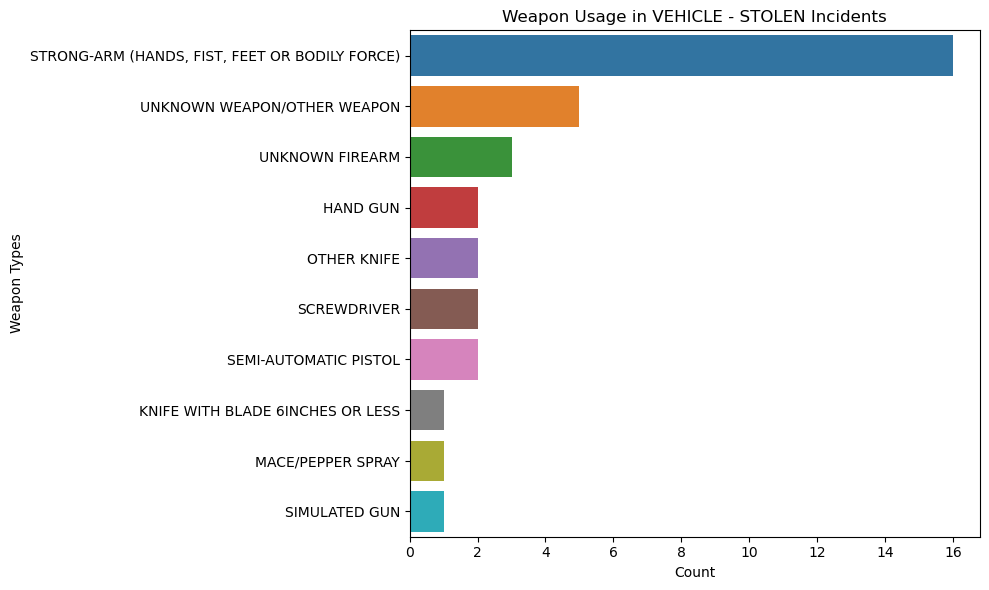

In [110]:
filtered_df = df[df['Crm Cd Desc'] == 'VEHICLE - STOLEN']

# Grouping 'Crm Cd Desc' by 'Weapon Desc' and counting occurrences
grouped_data = filtered_df.groupby('Weapon Desc')['Crm Cd Desc'].count().reset_index(name='Count')

# Sort the data by count in ascending order
grouped_data = grouped_data.sort_values(by='Count', ascending=False)

# Create a horizontal bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_data, x='Count', y='Weapon Desc', orient='h')
plt.title('Weapon Usage in VEHICLE - STOLEN Incidents')
plt.xlabel('Count')
plt.ylabel('Weapon Types')
plt.tight_layout()
plt.show()


*Now let's explore the areas, our goal here is to find the more crime prone areas.*

In [111]:
df['AREA NAME'].unique()

array(['Southwest', 'Central', 'N Hollywood', 'Mission', 'Devonshire',
       'Northeast', 'Harbor', 'Van Nuys', 'West Valley', 'West LA',
       'Wilshire', 'Pacific', 'Rampart', '77th Street', 'Hollenbeck',
       'Southeast', 'Hollywood', 'Newton', 'Foothill', 'Olympic',
       'Topanga'], dtype=object)

In [112]:
most_crimes=df['AREA NAME'].value_counts()

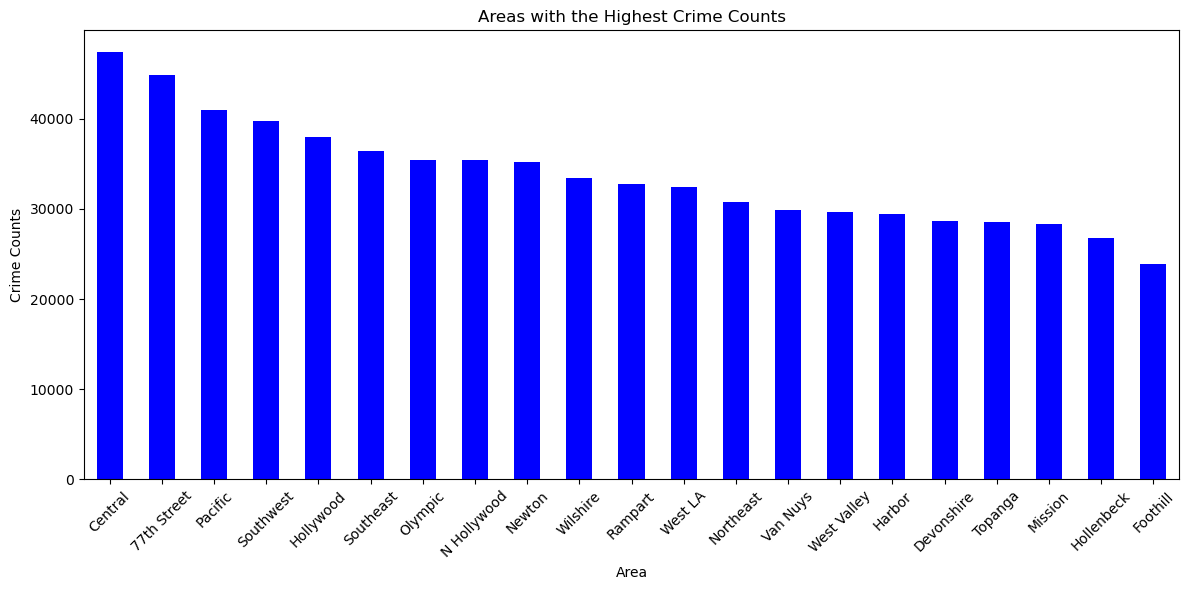

In [113]:
area_crime_counts = df['AREA NAME'].value_counts()

# Select the top 20 areas with the highest crime counts
top_areas = area_crime_counts

# Create a bar plot
plt.figure(figsize=(12, 6))
top_areas.sort_values(ascending=False).plot(kind='bar', color='blue')
plt.xlabel('Area')
plt.ylabel('Crime Counts')
plt.title('Areas with the Highest Crime Counts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [114]:
df['AREA'].value_counts()

1     47443
12    44877
14    40958
3     39763
6     37947
18    36377
20    35453
15    35392
13    35172
7     33468
2     32770
8     32382
11    30809
9     29915
10    29619
5     29449
17    28632
21    28605
19    28381
4     26725
16    23947
Name: AREA, dtype: int64

In [115]:
# Grouping 'Crm Cd Desc' by 'Weapon Desc' and counting occurrences
grouped_data = df.groupby('AREA NAME')['Crm Cd Desc'].value_counts()

# Displaying the grouped data
grouped_data

AREA NAME    Crm Cd Desc                                   
77th Street  VEHICLE - STOLEN                                  5671
             ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    4527
             THEFT OF IDENTITY                                 3402
             BATTERY - SIMPLE ASSAULT                          3372
             INTIMATE PARTNER - SIMPLE ASSAULT                 3108
                                                               ... 
Wilshire     PURSE SNATCHING                                      1
             THEFT FROM PERSON - ATTEMPT                          1
             TILL TAP - GRAND THEFT ($950.01 & OVER)              1
             TILL TAP - PETTY ($950 & UNDER)                      1
             WEAPONS POSSESSION/BOMBING                           1
Name: Crm Cd Desc, Length: 2309, dtype: int64

In [116]:
top_areas = grouped_data.groupby('AREA NAME').head(20)

# Display the top 20 areas with counts
print(top_areas)

AREA NAME    Crm Cd Desc                                   
77th Street  VEHICLE - STOLEN                                  5671
             ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    4527
             THEFT OF IDENTITY                                 3402
             BATTERY - SIMPLE ASSAULT                          3372
             INTIMATE PARTNER - SIMPLE ASSAULT                 3108
                                                               ... 
Wilshire     CRIMINAL THREATS - NO WEAPON DISPLAYED             696
             TRESPASSING                                        645
             BRANDISH WEAPON                                    412
             SHOPLIFTING-GRAND THEFT ($950.01 & OVER)           379
             OTHER MISCELLANEOUS CRIME                          354
Name: Crm Cd Desc, Length: 420, dtype: int64


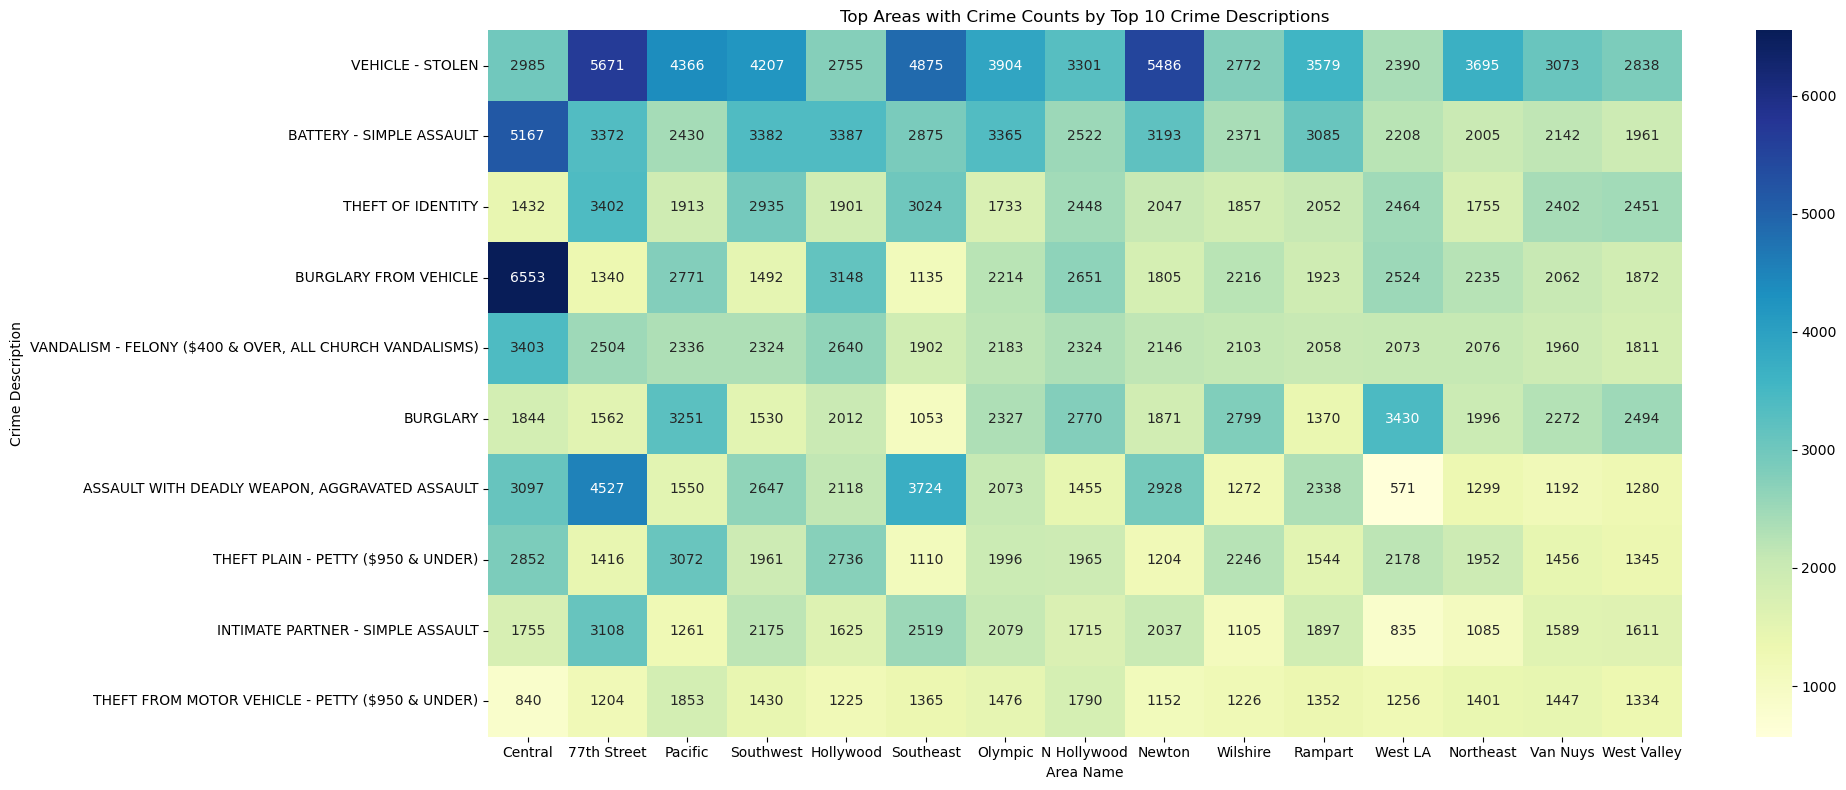

In [117]:

# Grouping 'Crm Cd Desc' by 'AREA NAME' and counting occurrences
grouped_data = df.groupby('AREA NAME')['Crm Cd Desc'].value_counts().unstack(fill_value=0)

# Selecting the top 5 areas based on total crime counts
top_areas = grouped_data.sum(axis=1).nlargest(15).index

# Filtering the data to include only the top areas
filtered_data = grouped_data.loc[top_areas]

# Selecting the top 10 'Crm Cd Desc' categories
top_crime_desc = df['Crm Cd Desc'].value_counts().head(10).index

# Filtering the data to include only the top 10 'Crm Cd Desc' categories
filtered_data = filtered_data[top_crime_desc]

# Creating a bar plot
plt.figure(figsize=(20, 8))
sns.heatmap(filtered_data.T, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Area Name')
plt.ylabel('Crime Description')
plt.title('Top Areas with Crime Counts by Top 10 Crime Descriptions')
plt.tight_layout()
plt.show()




Now let's explore the premise of the crimes,i.e. where did the most of crimes took place.

In [118]:
df['Premis Desc'].unique()

array(['SINGLE FAMILY DWELLING', 'SIDEWALK', 'POLICE FACILITY',
       'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
       'BEAUTY SUPPLY STORE', 'NIGHT CLUB (OPEN EVENINGS ONLY)',
       'DEPARTMENT STORE', 'OTHER BUSINESS', 'STREET', 'PARKING LOT',
       'HOTEL', "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)",
       'ALLEY', 'CONDOMINIUM/TOWNHOUSE', 'PUBLIC RESTROOM/OUTSIDE*',
       'GARAGE/CARPORT', 'MTA BUS',
       'NURSING/CONVALESCENT/RETIREMENT HOME', 'MINI-MART',
       'VEHICLE, PASSENGER/TRUCK', 'OTHER STORE', 'GROUP HOME',
       'MTA - RED LINE - UNION STATION', 'RESTAURANT/FAST FOOD',
       'MTA - RED LINE - PERSHING SQUARE', 'DRUG STORE',
       'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)',
       "SINGLE RESIDENCE OCCUPANCY (SRO'S) LOCATIONS",
       'PARKING UNDERGROUND/BUILDING', 'MOTEL', 'HOSPITAL', 'DRIVEWAY',
       'MARKET', 'LA UNION STATION (NOT LINE SPECIFIC)',
       'MISSIONS/SHELTERS', 'BAR/COCKTAIL/NIGHTCLUB', 'TOW YARD*',
       'DETEN

In [119]:
premise=df['Premis Desc'].value_counts()

In [120]:
premise.head(20)

STREET                                          178230
SINGLE FAMILY DWELLING                          120264
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)     86896
PARKING LOT                                      50681
OTHER BUSINESS                                   32899
SIDEWALK                                         30757
VEHICLE, PASSENGER/TRUCK                         21324
GARAGE/CARPORT                                   14571
DRIVEWAY                                         12013
RESTAURANT/FAST FOOD                              9017
DEPARTMENT STORE                                  7040
PARKING UNDERGROUND/BUILDING                      6632
OTHER PREMISE                                     5714
ALLEY                                             5243
MARKET                                            5207
OTHER RESIDENCE                                   4558
PARK/PLAYGROUND                                   4490
YARD (RESIDENTIAL/BUSINESS)                       4427
HOTEL     

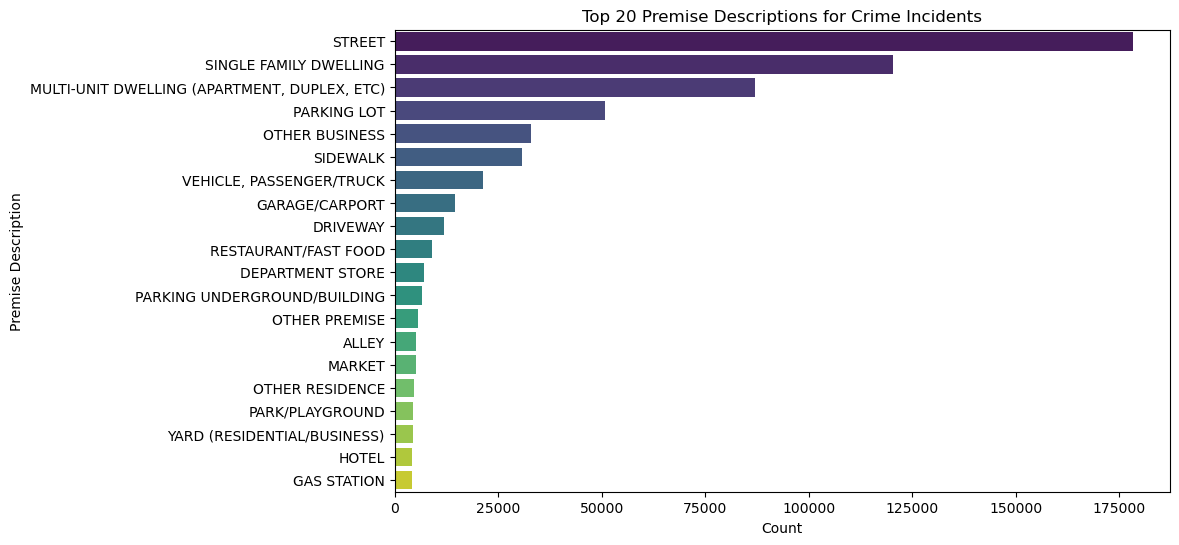

In [121]:

# Select the top 20 values
premise = df['Premis Desc'].value_counts()
top_20_values = premise.head(20)

# Convert top 20 values Series to a DataFrame
top_20_df = top_20_values.reset_index()
top_20_df.columns = ['Premis Desc', 'Count']

# Create a count plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Premis Desc', data=top_20_df, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Premise Description')
plt.title('Top 20 Premise Descriptions for Crime Incidents')
plt.show()


In [122]:
grouped_data = df.groupby('Premis Desc')['Crm Cd Desc'].value_counts()
grouped_data


Premis Desc                               Crm Cd Desc                                            
7TH AND METRO CENTER (NOT LINE SPECIFIC)  BATTERY - SIMPLE ASSAULT                                   55
                                          TRESPASSING                                                19
                                          ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT             14
                                          ROBBERY                                                    10
                                          THEFT PLAIN - PETTY ($950 & UNDER)                         10
                                                                                                     ..
YARD (RESIDENTIAL/BUSINESS)               SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT            1
                                          SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH     1
                                          STALKING                    

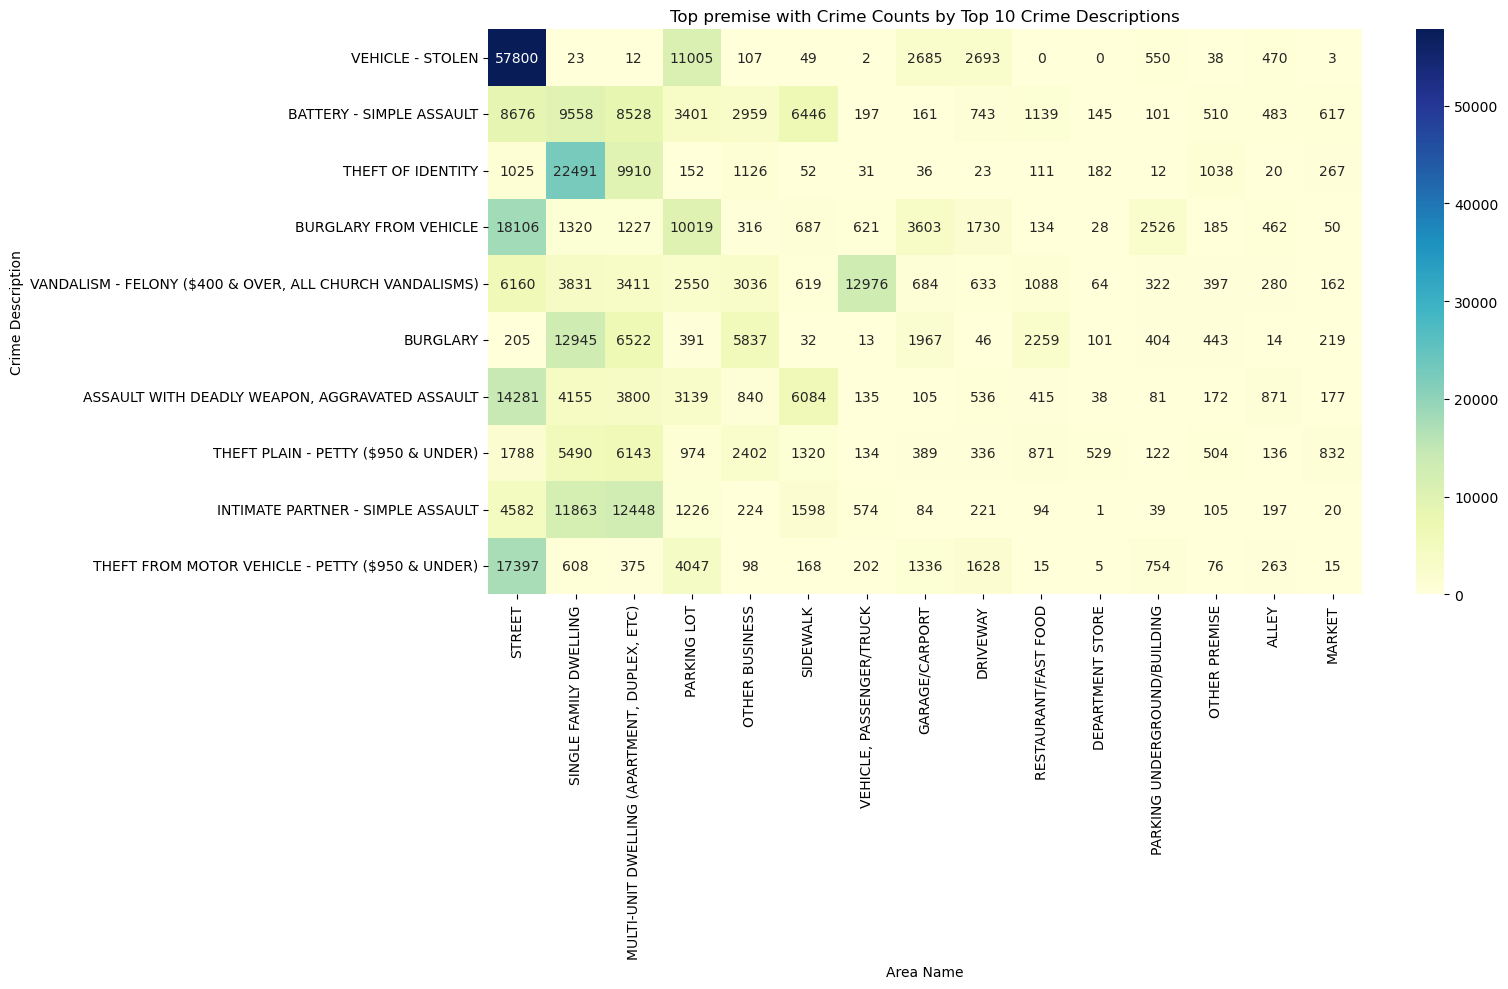

In [123]:
# Grouping 'Crm Cd Desc' by 'AREA NAME' and counting occurrences
grouped_data = df.groupby('Premis Desc')['Crm Cd Desc'].value_counts().unstack(fill_value=0)

# Selecting the top 5 areas based on total crime counts
top_premise = grouped_data.sum(axis=1).nlargest(15).index

# Filtering the data to include only the top areas
filtered_data = grouped_data.loc[top_premise]

# Selecting the top 10 'Crm Cd Desc' categories
top_crime_desc = df['Crm Cd Desc'].value_counts().head(10).index

# Filtering the data to include only the top 10 'Crm Cd Desc' categories
filtered_data = filtered_data[top_crime_desc]

# Creating a bar plot
plt.figure(figsize=(16, 10))
sns.heatmap(filtered_data.T, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel('Area Name')
plt.ylabel('Crime Description')
plt.title('Top premise with Crime Counts by Top 10 Crime Descriptions')
plt.tight_layout()
plt.show()

## 5. Time Series Analysis

In [124]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708084 entries, 0 to 708083
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           708084 non-null  int64  
 1   Date Rptd       708084 non-null  object 
 2   DATE OCC        708084 non-null  object 
 3   TIME OCC        708084 non-null  int64  
 4   AREA            708084 non-null  int64  
 5   AREA NAME       708084 non-null  object 
 6   Rpt Dist No     708084 non-null  int64  
 7   Part 1-2        708084 non-null  int64  
 8   Crm Cd          708084 non-null  int64  
 9   Crm Cd Desc     708084 non-null  object 
 10  Mocodes         610782 non-null  object 
 11  Vict Age        708084 non-null  int64  
 12  Vict Sex        708084 non-null  object 
 13  Vict Descent    708084 non-null  object 
 14  Premis Cd       708076 non-null  float64
 15  Premis Desc     707699 non-null  object 
 16  Weapon Used Cd  245937 non-null  float64
 17  Weapon Des

*The features DATE Rptd represents the reporting of the crime, Date OCC represents the date of crime committed. Time OCC is the military time. The features will be converted to date time format.*

In [125]:
df_crime['Date Rptd'] = pd.to_datetime(df_crime['Date Rptd'])
df_crime['DATE OCC'] = pd.to_datetime(df_crime['DATE OCC'])

In [126]:
df_crime['Year'] = df_crime['Date Rptd'].dt.year

In [127]:
df_crime['Year']

0         2020
1         2020
2         2020
3         2020
4         2020
          ... 
708079    2023
708080    2023
708081    2023
708082    2023
708083    2023
Name: Year, Length: 708084, dtype: int64

In [128]:
df_crime.head()

DR_NO  Date Rptd   DATE OCC  TIME OCC  AREA    AREA NAME  Rpt Dist No  \
0   10304468 2020-01-08 2020-01-08      2230     3    Southwest          377   
1  190101086 2020-01-02 2020-01-01       330     1      Central          163   
2  200110444 2020-04-14 2020-02-13      1200     1      Central          155   
3  191501505 2020-01-01 2020-01-01      1730    15  N Hollywood         1543   
4  191921269 2020-01-01 2020-01-01       415    19      Mission         1998   

   Part 1-2  Crm Cd                                        Crm Cd Desc  ...  \
0         2     624                           BATTERY - SIMPLE ASSAULT  ...   
1         2     624                           BATTERY - SIMPLE ASSAULT  ...   
2         2     845          SEX OFFENDER REGISTRANT OUT OF COMPLIANCE  ...   
3         2     745           VANDALISM - MISDEAMEANOR ($399 OR UNDER)  ...   
4         2     740  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...  ...   

    Status Desc  Crm Cd 1 Crm Cd 2 Crm Cd 3  Crm Cd 4  \
0   Adult Other     624.0      NaN      NaN       NaN   
1   Invest Cont     624.0      NaN      NaN       NaN   
2  Adult Arrest     845.0      NaN      NaN       NaN   
3   Invest Cont     745.0    998.0      NaN       NaN   
4   Invest Cont     740.0      NaN      NaN       NaN   

                                   LOCATION  Cross Street      LAT       LON  \
0   1100 W  39TH                         PL           NaN  34.0141 -118.2978   
1    700 S  HILL                         ST           NaN  34.0459 -118.2545   
2    200 E  6TH                          ST           NaN  34.0448 -118.2474   
3   5400    CORTEEN                      PL           NaN  34.1685 -118.4019   
4  14400    TITUS                        ST           NaN  34.2198 -118.4468   

   Year  
0  2020  
1  2020  
2  2020  
3  2020  
4  2020  

[5 rows x 29 columns]

In [129]:
df_crimes_date = df_crime.groupby(["Date Rptd", 'Year']).agg({'Crm Cd Desc':pd.Series.count}).reset_index()
df_crimes_date

Date Rptd  Year  Crm Cd Desc
0    2020-01-01  2020          353
1    2020-01-02  2020          398
2    2020-01-03  2020          403
3    2020-01-04  2020          436
4    2020-01-05  2020          420
...         ...   ...          ...
1205 2023-04-20  2023          587
1206 2023-04-21  2023          624
1207 2023-04-22  2023          469
1208 2023-04-23  2023          476
1209 2023-04-24  2023          328

[1210 rows x 3 columns]

In [130]:
df_crimes_date1 = df_crime.groupby(["Date Rptd", 'Year']).agg({'DR_NO':pd.Series.count}).reset_index()
# df_crimes_date = df_crimes_date["Date Rptd"].rolling(window=3).median()
df_crimes_date1

Date Rptd  Year  DR_NO
0    2020-01-01  2020    353
1    2020-01-02  2020    398
2    2020-01-03  2020    403
3    2020-01-04  2020    436
4    2020-01-05  2020    420
...         ...   ...    ...
1205 2023-04-20  2023    587
1206 2023-04-21  2023    624
1207 2023-04-22  2023    469
1208 2023-04-23  2023    476
1209 2023-04-24  2023    328

[1210 rows x 3 columns]

In [131]:
line_crime_date = px.line(data_frame=df_crimes_date, x='Date Rptd', y='Crm Cd Desc', title="Criminal Cases")
line_crime_date.update_layout(xaxis_title='Date Reported', yaxis_title='Total Cases')
line_crime_date.show()

In [174]:
# Smoothed monthly trend plot
df_crimes_date_n = df_crimes_date.set_index('Date Rptd')
roll_crimes_date = df_crimes_date_n['Crm Cd Desc'].rolling(window=30).median()
roll_crimes_date

Date Rptd
2020-01-01      NaN
2020-01-02      NaN
2020-01-03      NaN
2020-01-04      NaN
2020-01-05      NaN
              ...  
2023-04-20    599.0
2023-04-21    601.5
2023-04-22    591.5
2023-04-23    591.5
2023-04-24    591.5
Name: Crm Cd Desc, Length: 1210, dtype: float64

In [175]:
line_crime_date_rolling = px.line(data_frame=roll_crimes_date, x=roll_crimes_date.index, y=roll_crimes_date.values, title="Criminal Cases for Rolling 60 Days")
line_crime_date_rolling.update_layout(xaxis_title='Date Reported', yaxis_title='Total Cases')
line_crime_date_rolling.show()

In [132]:
df_crimes_date_n = df_crimes_date.set_index('Date Rptd')
df_crimes_date_n

Year  Crm Cd Desc
Date Rptd                    
2020-01-01  2020          353
2020-01-02  2020          398
2020-01-03  2020          403
2020-01-04  2020          436
2020-01-05  2020          420
...          ...          ...
2023-04-20  2023          587
2023-04-21  2023          624
2023-04-22  2023          469
2023-04-23  2023          476
2023-04-24  2023          328

[1210 rows x 2 columns]

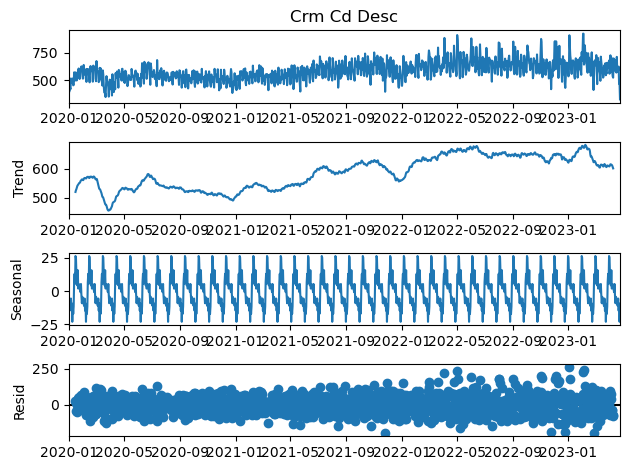

In [177]:
# Decomposition required
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df_crimes_date_n['Crm Cd Desc'], model='additive', 
                                   period=30)
decomposition.plot()
plt.show()

In [134]:
import statsmodels.api as sm
sm.stats.durbin_watson(df_crimes_date_n['Crm Cd Desc'])

0.01772835034072391

### Augmented Dickey Fuller Test - To check whether the dataset is 'Stationary' or 'Non-Stationary'

In [135]:
from statsmodels.tsa.stattools import adfuller

In [136]:
adfuller(df_crimes_date_n['Crm Cd Desc'])

(-2.7156101444844434,
 0.07137576602712452,
 21,
 1188,
 {'1%': -3.4358664022823593,
  '5%': -2.8639759363158124,
  '10%': -2.5680669397963927},
 12824.603932207789)

In [137]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("Augmented Dickey Fuller Test : To find data is stationary or non-stationary")
    labels = ['ADF Stats Test','P-Values', '#Lags','No. of Observation']
    
    for i , j in zip(result, labels):
        print(j + " = " + str(i))
    
    if result[1] <=0.05:
        print("Strong evidence against null hypothesis and my time series is Stationary")
    else:
        print("Weak evidence against null hypothesis and my time series is Non-Stationary")  

In [138]:
adf_check(df_crimes_date_n['Crm Cd Desc'])

Augmented Dickey Fuller Test : To find data is stationary or non-stationary
ADF Stats Test = -2.7156101444844434
P-Values = 0.07137576602712452
#Lags = 21
No. of Observation = 1188
Weak evidence against null hypothesis and my time series is Non-Stationary


In [139]:
df_crimes_date_n['1st Diff'] = df_crimes_date_n['Crm Cd Desc'] - df_crimes_date_n['Crm Cd Desc'].shift(1)

In [140]:
df_crimes_date_n.head(20)

Year  Crm Cd Desc  1st Diff
Date Rptd                              
2020-01-01  2020          353       NaN
2020-01-02  2020          398      45.0
2020-01-03  2020          403       5.0
2020-01-04  2020          436      33.0
2020-01-05  2020          420     -16.0
2020-01-06  2020          517      97.0
2020-01-07  2020          479     -38.0
2020-01-08  2020          498      19.0
2020-01-09  2020          503       5.0
2020-01-10  2020          517      14.0
2020-01-11  2020          455     -62.0
2020-01-12  2020          458       3.0
2020-01-13  2020          572     114.0
2020-01-14  2020          495     -77.0
2020-01-15  2020          517      22.0
2020-01-16  2020          572      55.0
2020-01-17  2020          565      -7.0
2020-01-18  2020          499     -66.0
2020-01-19  2020          500       1.0
2020-01-20  2020          544      44.0

In [141]:
adf_check(df_crimes_date_n['1st Diff'].dropna())

Augmented Dickey Fuller Test : To find data is stationary or non-stationary
ADF Stats Test = -10.653737667162344
P-Values = 4.5906234432988e-19
#Lags = 20
No. of Observation = 1188
Strong evidence against null hypothesis and my time series is Stationary


In [142]:
df_crimes_date_n['Seasonality'] = df_crimes_date_n['Crm Cd Desc'] - df_crimes_date_n['Crm Cd Desc'].shift(30)

In [143]:
df_crimes_date_n.tail(20)

Year  Crm Cd Desc  1st Diff  Seasonality
Date Rptd                                           
2023-04-05  2023          706      48.0          2.0
2023-04-06  2023          576    -130.0       -124.0
2023-04-07  2023          575      -1.0        -43.0
2023-04-08  2023          536     -39.0       -126.0
2023-04-09  2023          524     -12.0        -59.0
2023-04-10  2023          698     174.0        136.0
2023-04-11  2023          620     -78.0        124.0
2023-04-12  2023          607     -13.0       -107.0
2023-04-13  2023          683      76.0         17.0
2023-04-14  2023          581    -102.0        -50.0
2023-04-15  2023          578      -3.0        -19.0
2023-04-16  2023          570      -8.0         12.0
2023-04-17  2023          712     142.0        188.0
2023-04-18  2023          585    -127.0         48.0
2023-04-19  2023          579      -6.0        -48.0
2023-04-20  2023          587       8.0        -51.0
2023-04-21  2023          624      37.0         22.0
2023-04-22  2023          469    -155.0       -186.0
2023-04-23  2023          476       7.0        -70.0
2023-04-24  2023          328    -148.0       -239.0

In [144]:
adf_check(df_crimes_date_n['Seasonality'].dropna())

Augmented Dickey Fuller Test : To find data is stationary or non-stationary
ADF Stats Test = -6.7630488297467855
P-Values = 2.760979489474577e-09
#Lags = 22
No. of Observation = 1157
Strong evidence against null hypothesis and my time series is Stationary


In [145]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### Calculation of autorrelation and partial autocrrelation coefficients

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



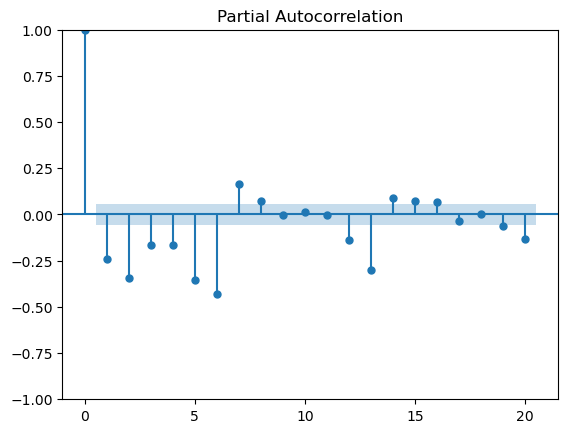

In [146]:
plot_pacf(df_crimes_date_n['1st Diff'].dropna(), lags=20)
plt.show()

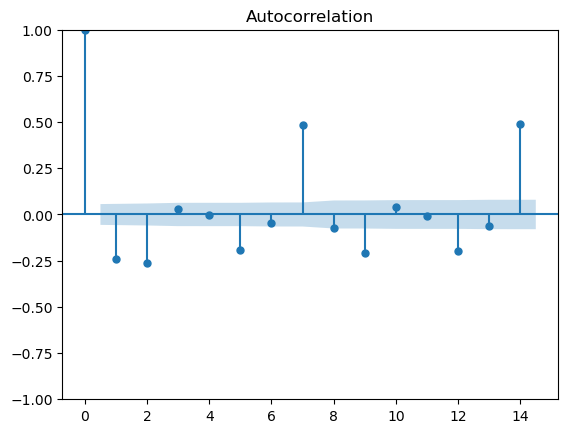

In [147]:
plot_acf(df_crimes_date_n['1st Diff'].dropna(), lags=14)
plt.show()

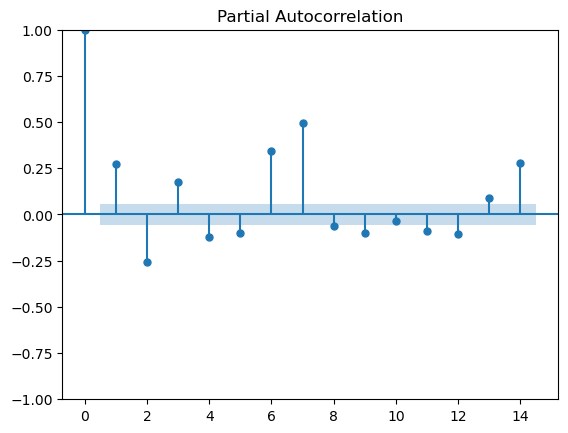

In [148]:
plot_pacf(df_crimes_date_n['Seasonality'].dropna(), lags=14)
plt.show()

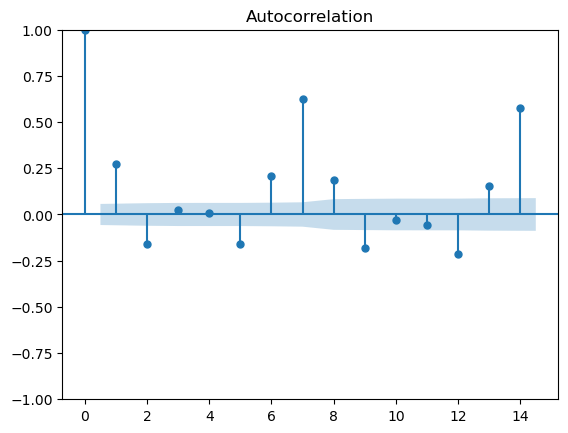

In [149]:
plot_acf(df_crimes_date_n['Seasonality'].dropna(), lags=14)
plt.show()

p=8,d=1,q=2,P=9,D=1,Q=2

In [150]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [154]:
df_crimes_date_n.head()

Year  Crm Cd Desc  1st Diff  Seasonality
Date Rptd                                           
2020-01-01  2020          353       NaN          NaN
2020-01-02  2020          398      45.0          NaN
2020-01-03  2020          403       5.0          NaN
2020-01-04  2020          436      33.0          NaN
2020-01-05  2020          420     -16.0          NaN

In [155]:
model = sm.tsa.statespace.SARIMAX(df_crimes_date_n['Crm Cd Desc'], order=(8,1,2),
                                  seasonal_order=(9,1,2,30))

result = model.fit()
print(result.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                     SARIMAX Results                                      
Dep. Variable:                        Crm Cd Desc   No. Observations:                 1210
Model:             SARIMAX(8, 1, 2)x(9, 1, 2, 30)   Log Likelihood               -6451.349
Date:                            Tue, 08 Aug 2023   AIC                          12946.699
Time:                                    16:20:05   BIC                          13058.292
Sample:                                01-01-2020   HQIC                         12988.772
                                     - 04-24-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7567      0.200      3.778      0.000       0.364       1.149
ar.L2         -0.1707      0.070   

In [156]:
len(df_crimes_date_n)

1210

<AxesSubplot:xlabel='Date Rptd'>

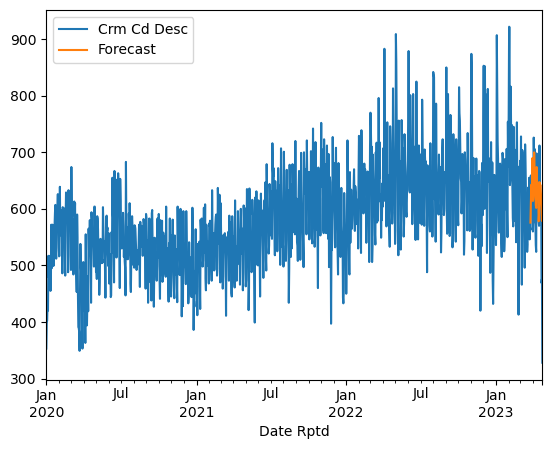

In [161]:
# validate the model by using training dataset
df_crimes_date_n['Forecast'] = result.predict(start=1180, end=1210, dynamic = True)
df_crimes_date_n[['Crm Cd Desc', 'Forecast']].plot()





In [163]:

# Validate the model by using the training dataset and generate forecasts
df_crimes_date_n['Forecast'] = result.predict(start=1180, end=1210, dynamic=True)

# Create a line plot using Plotly Express
fig = px.line(df_crimes_date_n, x=df_crimes_date_n.index,
              y=['Crm Cd Desc', 'Forecast'],
              labels={'index': 'Date', 'value': 'Values'},
              title='Crime Description vs. Forecast')

# Update the layout to set the plot size
fig.update_layout(width=1000, height=600)

# Show the plot
fig.show()







In [164]:
from pandas.tseries.offsets import DateOffset

In [165]:


# Calculate the last date in the index of the DataFrame
last_date = df_crimes_date_n.index[-1]

# Create a list of future dates with a daily offset
future_data = [last_date + DateOffset(days=x) for x in range(0, 91)]

# Print the list of future dates
print(future_data)


[Timestamp('2023-04-24 00:00:00'), Timestamp('2023-04-25 00:00:00'), Timestamp('2023-04-26 00:00:00'), Timestamp('2023-04-27 00:00:00'), Timestamp('2023-04-28 00:00:00'), Timestamp('2023-04-29 00:00:00'), Timestamp('2023-04-30 00:00:00'), Timestamp('2023-05-01 00:00:00'), Timestamp('2023-05-02 00:00:00'), Timestamp('2023-05-03 00:00:00'), Timestamp('2023-05-04 00:00:00'), Timestamp('2023-05-05 00:00:00'), Timestamp('2023-05-06 00:00:00'), Timestamp('2023-05-07 00:00:00'), Timestamp('2023-05-08 00:00:00'), Timestamp('2023-05-09 00:00:00'), Timestamp('2023-05-10 00:00:00'), Timestamp('2023-05-11 00:00:00'), Timestamp('2023-05-12 00:00:00'), Timestamp('2023-05-13 00:00:00'), Timestamp('2023-05-14 00:00:00'), Timestamp('2023-05-15 00:00:00'), Timestamp('2023-05-16 00:00:00'), Timestamp('2023-05-17 00:00:00'), Timestamp('2023-05-18 00:00:00'), Timestamp('2023-05-19 00:00:00'), Timestamp('2023-05-20 00:00:00'), Timestamp('2023-05-21 00:00:00'), Timestamp('2023-05-22 00:00:00'), Timestamp('20

In [166]:
df_crimes_date_n.index[-1]

Timestamp('2023-04-24 00:00:00')

In [167]:
future_dates_df = pd.DataFrame(index = future_data[1:], columns = df_crimes_date_n.columns)

In [168]:
future_dates_df.tail()

Year Crm Cd Desc 1st Diff Seasonality Forecast
2023-07-19  NaN         NaN      NaN         NaN      NaN
2023-07-20  NaN         NaN      NaN         NaN      NaN
2023-07-21  NaN         NaN      NaN         NaN      NaN
2023-07-22  NaN         NaN      NaN         NaN      NaN
2023-07-23  NaN         NaN      NaN         NaN      NaN

In [169]:
future_pred = pd.concat([df_crimes_date_n,future_dates_df ])

In [170]:
future_pred.head()

Year Crm Cd Desc  1st Diff  Seasonality  Forecast
2020-01-01  2020         353       NaN          NaN       NaN
2020-01-02  2020         398      45.0          NaN       NaN
2020-01-03  2020         403       5.0          NaN       NaN
2020-01-04  2020         436      33.0          NaN       NaN
2020-01-05  2020         420     -16.0          NaN       NaN

In [171]:
print(len(future_pred))

1300


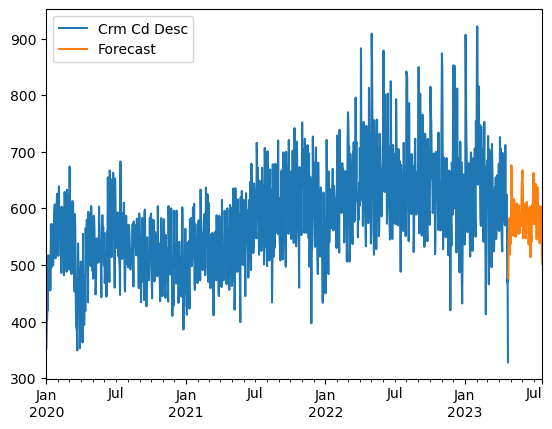

In [172]:
future_pred['Forecast'] = result.predict(start=1210, end=1300, dynamic=True)
future_pred[['Crm Cd Desc', 'Forecast']].plot()
plt.show()

In [173]:
import plotly.graph_objects as go

# Assuming you have a DataFrame named future_pred and a 'Forecast' column

# Create a line plot using Plotly Graph Objects
fig = go.Figure()

# Add the actual 'Crm Cd Desc' data to the plot
fig.add_trace(go.Scatter(x=future_pred.index, y=future_pred['Crm Cd Desc'], mode='lines', name='Crm Cd Desc'))

# Add the forecast 'Forecast' data to the plot
fig.add_trace(go.Scatter(x=future_pred.index, y=future_pred['Forecast'], mode='lines', name='Forecast'))

# Update layout settings
fig.update_layout(xaxis_title='Date', yaxis_title='Values', title='Crime Description vs. Forecast')

# Show the plot
fig.show()


# 6. Conclusion:

* As we have seen in the plots vehicular theft is most common crime and most of the cases in this category are under   investigation, 
* Most of the time it is stolen from the street.  
* Male victims are more likely to be involved in assaults and female victims are more likely to be assaulted by their own partners. 
* Female victims are also more prone to theifs stealing their credit card information(identity theft).  
* Hispanic people are most victimized group in the three major race(White,Black,Hispanic). 
* Within the races there was difference according to genders, such as white female were more prone to be victims of burgalary or identity theft while Hispanic female were more prone to be victims of domestic violence.

* At last we did a time series analysis of the data set and found the model to be working well on a set of generated data through resampling. 